# E-COMMERCE CUSTOMER CHURN

### By: Ulfah Dwilestary

---
### Outline

A. Business Problem Understanding  
B. Data Understanding  
C. Data Cleaning  
D. Data Preprocessing & Feature Engineering  
E. Modeling  
F. Hyperparameter Tuning  
G. Model Evaluation  
H. Explainable Model  
I. Model Deployment  
J. Conclusion & Recommendation  


---
# A. Business Problem Understanding

## Context

E-commerce merupakan platform online yang memungkinkan penjual dan pelanggan melakukan transaksi jual beli melalui website atau aplikasi seluler. Keuntungan perusahaan diperoleh dari setiap transaksi pelanggan, sehingga peningkatan jumlah pelanggan menjadi faktor krusial untuk mendorong pertumbuhan pendapatan. Selain itu, mempertahankan pelanggan lebih efektif secara biaya dibandingkan menarik pelanggan baru, sehingga perusahaan perlu mengidentifikasi pelanggan yang berpotensi berhenti menggunakan layanan agar dapat menawarkan promo yang relevan dan menarik untuk meningkatkan retensi.

## Problem Statement

E-commerce perlu memahami tingkat churn pelanggan untuk meminimalkan potensi kerugian pendapatan. Oleh karena itu, diperlukan upaya prediksi pelanggan yang berisiko meninggalkan layanan sebelum mereka benar-benar berhenti. Langkah ini memungkinkan perusahaan untuk meningkatkan layanan, seperti memberikan penawaran promosi yang menarik. Namun, promosi tersebut harus ditargetkan dengan tepat agar efektif. Dengan pendekatan ini, e-commerce dapat mengurangi risiko kehilangan pendapatan/kerugian sekaligus mempertahankan pelanggan.

Penelitian menunjukkan bahwa mendapatkan pelanggan baru bisa jauh lebih mahal dibandingkan mempertahankan pelanggan yang sudah ada, yaitu bisa mencapai **4 - 5 kali lipat lebih tinggi**. Jika pelanggan churn, perusahaan harus menggantinya dengan pelanggan baru, yang berarti ada biaya tambahan untuk pemasaran, promosi, dan proses penjualan. Meskipun perbedaan ini bervariasi di setiap industri, **mempertahankan pelanggan sering kali lebih hemat dan efektif untuk pertumbuhan bisnis.**

[Reference](https://www.paddle.com/resources/customer-acquisition-vs-retention)

## Goals
* Memprediksi pelanggan yang berpotensi churn dengan mengembangkan model prediksi untuk mengidentifikasi pelanggan yang berisiko berhenti menggunakan layanan e-commerce.
* Memberikan rekomendasi berbasis data kepada tim marketing untuk membantu mereka menjalankan strategi retensi pelanggan.
* Meningkatkan efektivitas prediksi dan retensi pelanggan dengan memungkinkan tim marketing untuk mengimplementasikan strategi yang tepat berdasarkan hasil prediksi.



## Analytic Approach

1. Mengembangkan model prediksi churn menggunakan data pelanggan historis untuk mengidentifikasi pelanggan yang berpotensi churn sebelum mereka meninggalkan layanan.

2. Mengoptimalkan strategi promosi dengan:
    - Melakukan segmentasi pelanggan berdasarkan karakteristik dan perilaku mereka.
    - Menerapkan model probabilitas untuk memprediksi pelanggan yang kemungkinan besar akan memanfaatkan promosi.
    - Menargetkan promosi hanya kepada pelanggan dengan probabilitas tinggi untuk meningkatkan efisiensi dan efektivitas.

## Metric Evaluation

|       | **Predicted - Positive**| **Predicted - Negative** |
| --- | --- | --- |
| **Actual - Positive**     | TP | FN |
| **Actual - Negative**      | FP | TN |

Target:   
0 : Pelanggan tidak *churn*  
1 : Pelanggan *churn*

- (TP) True Positive: Model memprediksi pelanggan churn dan hasilnya churn
- (FP) False Positive: Model memprediksi pelanggan churn, namun faktanya tidak churn
- (FN) False Negative: Model memprediksi pelanggan tidak churn, namun faktanya churn
- (TN) True Negative: Model memprediksi pelanggan tidak churn dan hasilnya tidak churn
  
Dapat dilihat dari metric diatas, ada beberapa nilai False. Berikut analisis dari kesalahan prediksi tersebut:

**Type 1 error: False Positive**
- Model salah memprediksi churn (padahal tidak churn).
- Dampak: Perusahaan memberikan promosi yang tidak perlu → Asumsi biaya tambahan ($100/orang).

**Type 2 error: False Negative**
- Model salah memprediksi tidak churn (padahal churn).
- Dampak: Kehilangan pelanggan → Asumsi kerugian $450/orang (lebih besar).


Kesalahan prediksi False Positive (FP) dan False Negative (FN) sama-sama dapat merugikan perusahaan. Namun, dampak dari FN (gagal mengidentifikasi pelanggan yang akan churn) lebih besar dibandingkan FP (salah mengira pelanggan akan churn padahal tidak). Oleh sebab itu, meskipun model berusaha meminimalkan kedua jenis kesalahan, **prioritas utama adalah mengurangi FN**. Untuk mencapai hal ini, digunakan **F2 Score** sebagai metrik utama, karena metrik ini memberikan perhatian dua kali lebih besar pada FN dibandingkan FP.

---
# B. Data Undestanding

Data yang digunakan dapat diakses pada link [Data E-commerce Customer Churn](https://drive.google.com/file/d/1PjZj6DDwv9Esxxi1wLnlaWUC3qMWRNo8/view?usp=drive_link)

Berikut penjelasan mengenai Feature dan Target:

**Target** : **Churn** (0 : Tidak Churn , 1 : Churn)

| **Features**               | **Description**                                                  | **Data Type** |
| -------------------------- | ---------------------------------------------------------------- | ------------- |
| Tenure                     | Lama waktu customer berlangganan (dalam bulan)                  | float64       |
| WarehouseToHome            | Jarak antara gudang ke rumah customer (km)                       | float64       |
| NumberOfDeviceRegistered   | Total device yang terdaftar                                      | int64         |
| PreferedOrderCat           | Kategori pesanan dalam satu bulan terakhir                       | object        |
| SatisfactionScore          | Skor kepuasan customer (range 1-5)                               | int64         |
| MaritalStatus              | Status pernikahan customer                                      | object        |
| NumberOfAddress            | Total alamat terdaftar                                          | int64         |
| Complain                   | Komplain dalam satu bulan terakhir (0 : tidak ada, 1: ada)      | int64         |
| DaySinceLastOrder          | Jumlah hari sejak pesanan terakhir                               | float64       |
| CashbackAmount             | Cashback rata-rata dalam satu bulan terakhir                     | float64       |
| Churn                      | (0 : Tidak Churn , 1 : Churn)                                   | int64         |


## Import Library

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE, RFECV
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler, KBinsDiscretizer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, fbeta_score, make_scorer, roc_auc_score, f1_score, accuracy_score, recall_score, precision_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC


# Imbalance Dataset
import imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, KMeansSMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN,SMOTETomek

# Shap
import shap

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Saving Model
import pickle

# Statistical Tests
from scipy.stats import normaltest

## Load Dataset

In [2]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


### First Data of Dataset

In [3]:
df.iloc[0]

Tenure                                    15.0
WarehouseToHome                           29.0
NumberOfDeviceRegistered                     4
PreferedOrderCat            Laptop & Accessory
SatisfactionScore                            3
MaritalStatus                           Single
NumberOfAddress                              2
Complain                                     0
DaySinceLastOrder                          7.0
CashbackAmount                          143.32
Churn                                        0
Name: 0, dtype: object

| **Features** | **Description** |
| --- | --- |
| Tenure = 15 | Customer sudah menggunakan layanan selama 15 bulan |
| WarehouseToHome = 29 | Jarak antara gudang ke rumah customer adalah 29 km |
| NumberOfDeviceRegistered = 4 | Customer mendaftarkan 4 device untuk akunnya |
| PreferedOrderCat = Laptop & Accessory | Customer memilih membeli Laptop & Accessory dalam sebulan terakhir |
| SatisfactionScore = 3 | Customer memberi nilai 3 dari 5 untuk kepuasan layanan |
| MaritalStatus = Single | Status customer adalah single |
| NumberOfAddress = 2 | Customer menginput 2 alamat di akunnya |
| Complain = 0 | Customer tidak mengajukan complain |
| DaySinceLastOrder = 7 | Customer melakukan pembelian 7 hari yang lalu |
| CashbackAmount = 143.32 | Customer mendapat rata-rata cashback $143.32 pada bulan ini |
| Churn | 0 : Customer diprediksi Tidak Churn |

**Dengan feature tersebut, customer diprediksi Tidak Churn (0)**


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


Tipe data sudah sesuai, jadi tidak perlu ada yang diubah

In [5]:
df.shape

(3941, 11)

In [6]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [7]:
df.describe(include='object')

,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


---
# C. Data Cleaning

> ### Sebelum Data Cleaning

In [8]:
list_item = []
for col in df.columns:
    data_count = len(df[col].dropna()) 
    missing_value_count = df[col].isna().sum()
    missing_value_percentage = round((missing_value_count / len(df[col])) * 100, 2)
    unique_count = df[col].nunique()
    unique_sample = df[col].dropna().unique() 
    
    list_item.append([col, df[col].dtype, data_count, missing_value_count, missing_value_percentage, unique_count, unique_sample])

df_items_info = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
                                      'Missing Value %', 'Number of Unique', 'Unique Sample'],
                             data=list_item)

df_items_info.sort_values(by=['Data Type']).reset_index(drop=True)

,Column Name,Data Type,Data Count,Missing Value,Missing Value %,Number of Unique,Unique Sample
0,NumberOfDeviceRegistered,int64,3941,0,0.00,6,"[4, 3, 6, 2, 5, 1]"
1,SatisfactionScore,int64,3941,0,0.00,5,"[3, 1, 4, 2, 5]"
2,NumberOfAddress,int64,3941,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
3,Complain,int64,3941,0,0.00,2,"[0, 1]"
4,Churn,int64,3941,0,0.00,2,"[0, 1]"
5,Tenure,float64,3747,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
6,WarehouseToHome,float64,3772,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
7,DaySinceLastOrder,float64,3728,213,5.40,22,"[7.0, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0,..."
8,CashbackAmount,float64,3941,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."
9,PreferedOrderCat,object,3941,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."


- Tipe data pada setiap kolom sudah sesuai, sehingga tidak diperlukan penyesuaian tipe data untuk analisis selanjutnya.
- Kolom `Tenure`, `WarehouseToHome`, dan `DaySinceLastOrder` yang berisi data numerik memiliki missing value bertipe **NaN** dengan persentase sekitar 5%. Missing value ini akan kita tangani di tahap berikutnya karena jumlahnya cukup signifikan.
- Pada kolom `PreferedOrderCat` terdapat inkonsistensi data, di mana beberapa nilai memiliki makna yang sama. Misalnya, *Mobile* dan *Mobile Phone* berarti sama, sehingga akan kita gabungkan untuk konsistensi.


### Proporsi Customer Churn

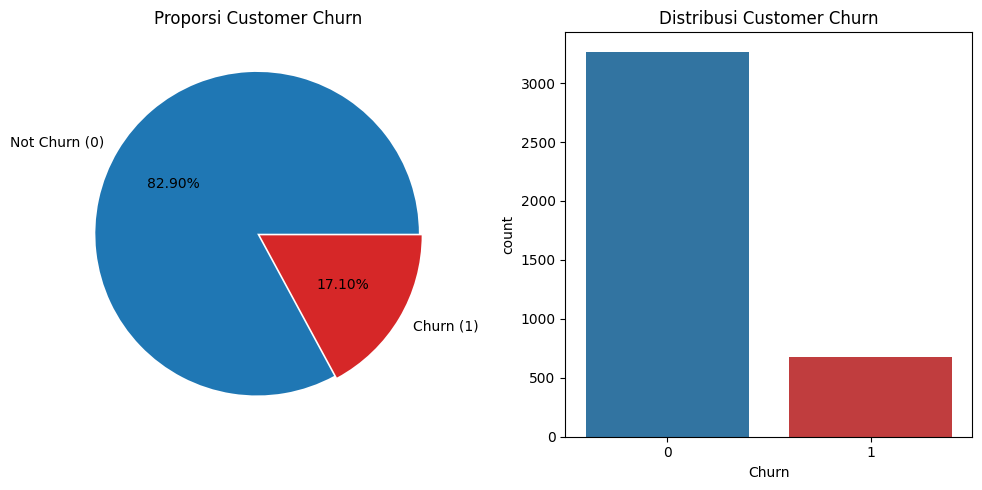

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(df['Churn'].value_counts(), labels=['Not Churn (0)', 'Churn (1)'], autopct='%.2f%%', explode=(0.01, 0.01), 
        colors=['#1f77b4', '#d62728'])  
plt.title('Proporsi Customer Churn')

plt.subplot(1,2,2)
sns.countplot(x=df['Churn'], palette=['#1f77b4', '#d62728'])
plt.title('Distribusi Customer Churn')

plt.tight_layout()
plt.show()


- Dataset ini memiliki target yang tidak seimbang (*imbalanced*), di mana proporsi salah satu kelas jauh lebih besar dibandingkan kelas lainnya.sampling-splitting/imbalanced-data).  
- Kelas 0 (tidak churn) mencakup 82,90% data, sedangkan kelas 1 (churn) hanya 17,10%.  
- Ketidakseimbangan ini dapat menyebabkan model kurang akurat dalam memprediksi kelas minoritas. Oleh karena itu, diperlukan teknik khusus untuk menangani masalah *imbalance* selama proses analisis.  


### Distribusi data setiap kolom numerik

Distribusi data perlu dilihat agar bisa menentukan metode apa yang akan digunakan selanjutnya

In [10]:
kolom = ['Churn', 'Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 
         'NumberOfDeviceRegistered', 'SatisfactionScore', 
         'NumberOfAddress', 'Complain', 'CashbackAmount']

distribusi = [
    'normal' if normaltest(df[i])[1] > 0.05 else 'tidak normal' 
    for i in kolom
]

pd.DataFrame({'Distribusi': distribusi}, index=kolom).T


,Churn,Tenure,WarehouseToHome,DaySinceLastOrder,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CashbackAmount
Distribusi,tidak normal,tidak normal,tidak normal,tidak normal,tidak normal,tidak normal,tidak normal,tidak normal,tidak normal


Semua kolom numerik tidak berdistribusi normal, sehingga data termasuk dalam kategori non-parametrik.

### Handling inconsisten data

In [11]:
#Mengubah PreferedOrderCat Device dari Mobile jadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

### Duplikat data

In [12]:
df.duplicated().sum()

np.int64(672)

In [13]:
df.drop_duplicates(keep='first',inplace=True)
df=df.reset_index().drop(columns = {'index'})

### Cek missing value pada dataset

<Axes: >

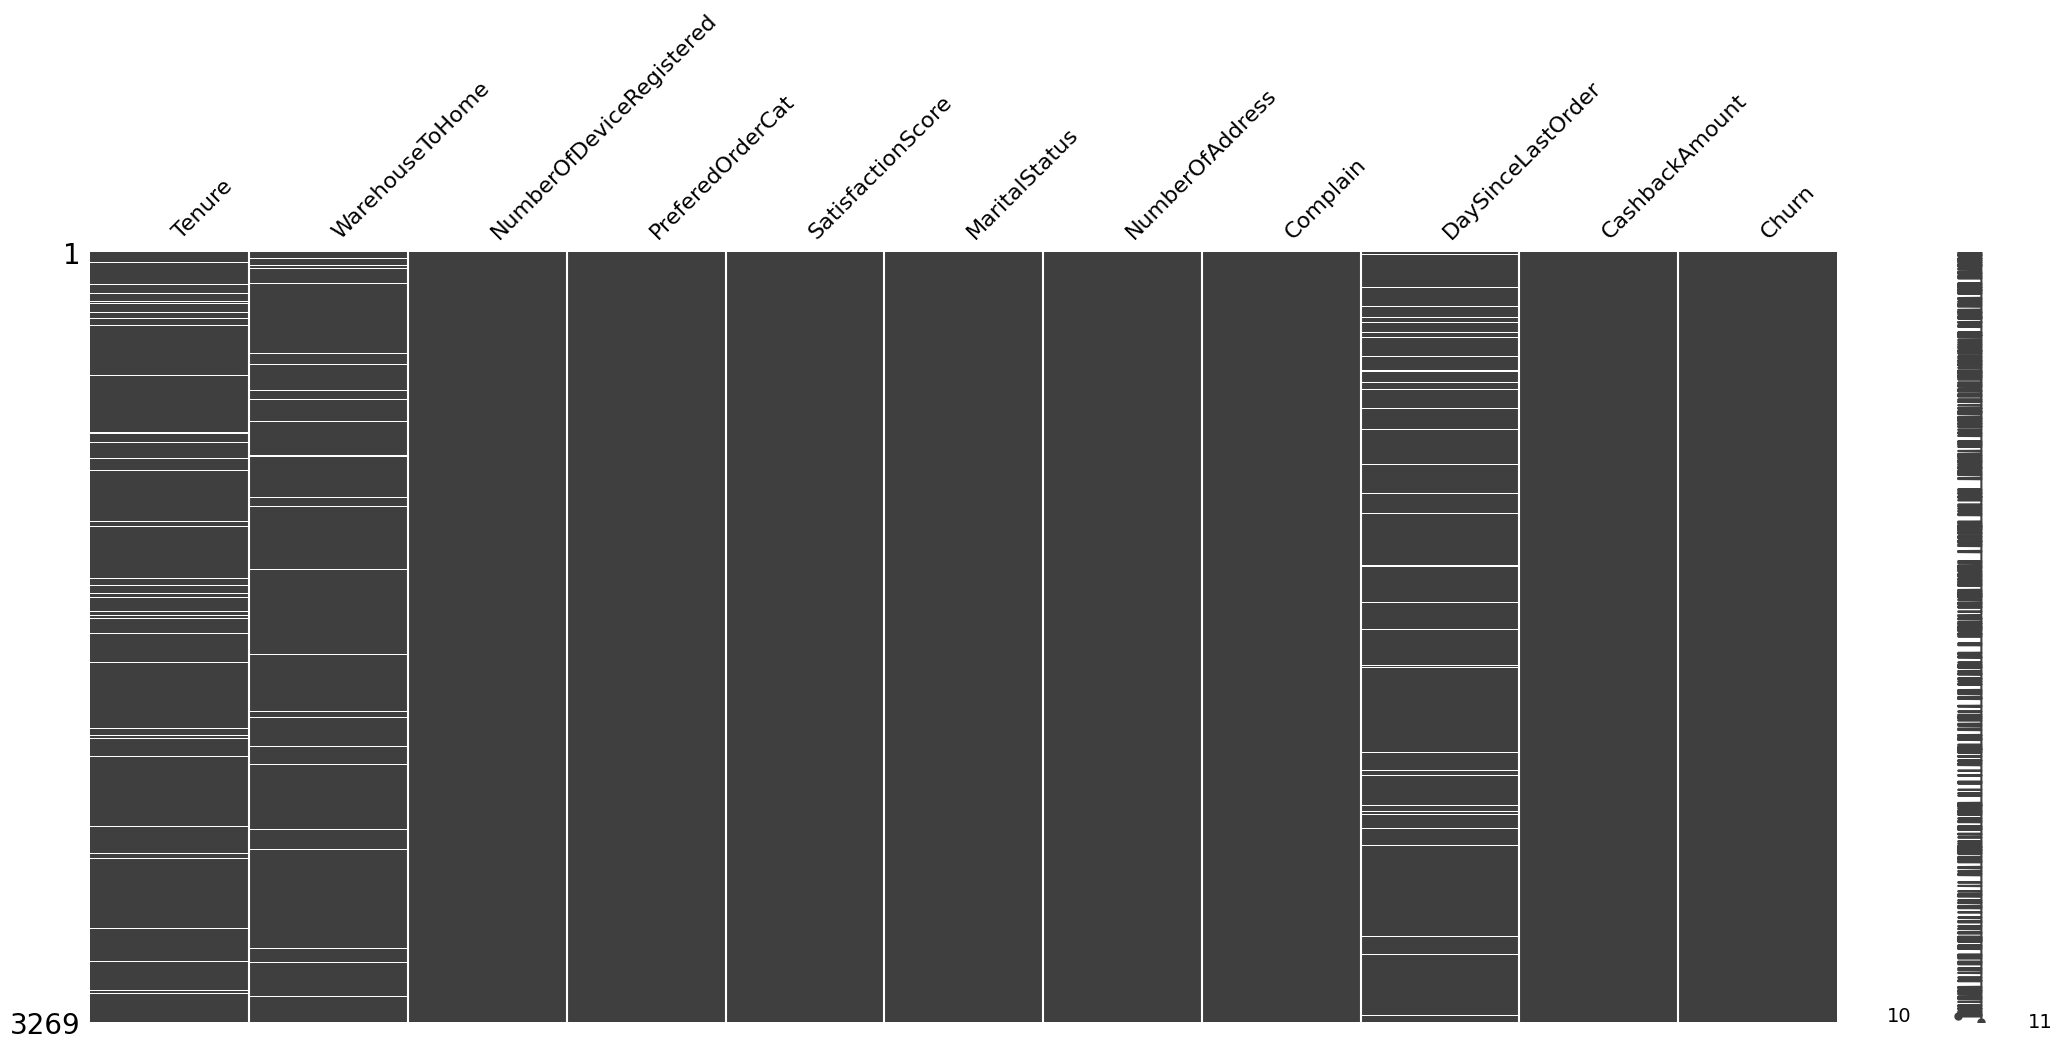

In [14]:
missingno.matrix(df)

In [15]:
missing_data = pd.DataFrame({
    'Missing Values': df.isna().sum(),
    'Percentage': (df.isna().mean() * 100).round(2)
})
missing_data

,Missing Values,Percentage
Tenure,159,4.86
WarehouseToHome,135,4.13
NumberOfDeviceRegistered,0,0.00
PreferedOrderCat,0,0.00
SatisfactionScore,0,0.00
MaritalStatus,0,0.00
NumberOfAddress,0,0.00
Complain,0,0.00
DaySinceLastOrder,181,5.54
CashbackAmount,0,0.00


- Terlihat bahwa missing value pada setiap kolom memiliki pola yang acak.  
- Pengisian missing value pada kolom `Tenure`, `WarehouseToHome`, dan `DaySinceLastOrder` tidak menggunakan metode konvensional seperti mean atau median, mengingat jumlah missing value yang cukup besar (~5%) pada kolom tersebut. Handle missing value akan dilakukan di step preprocessing dengan teknik KNN Imputer.


### Outlier pada data numerik

In [16]:
kolom_num = ['Tenure','WarehouseToHome','DaySinceLastOrder','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','CashbackAmount']

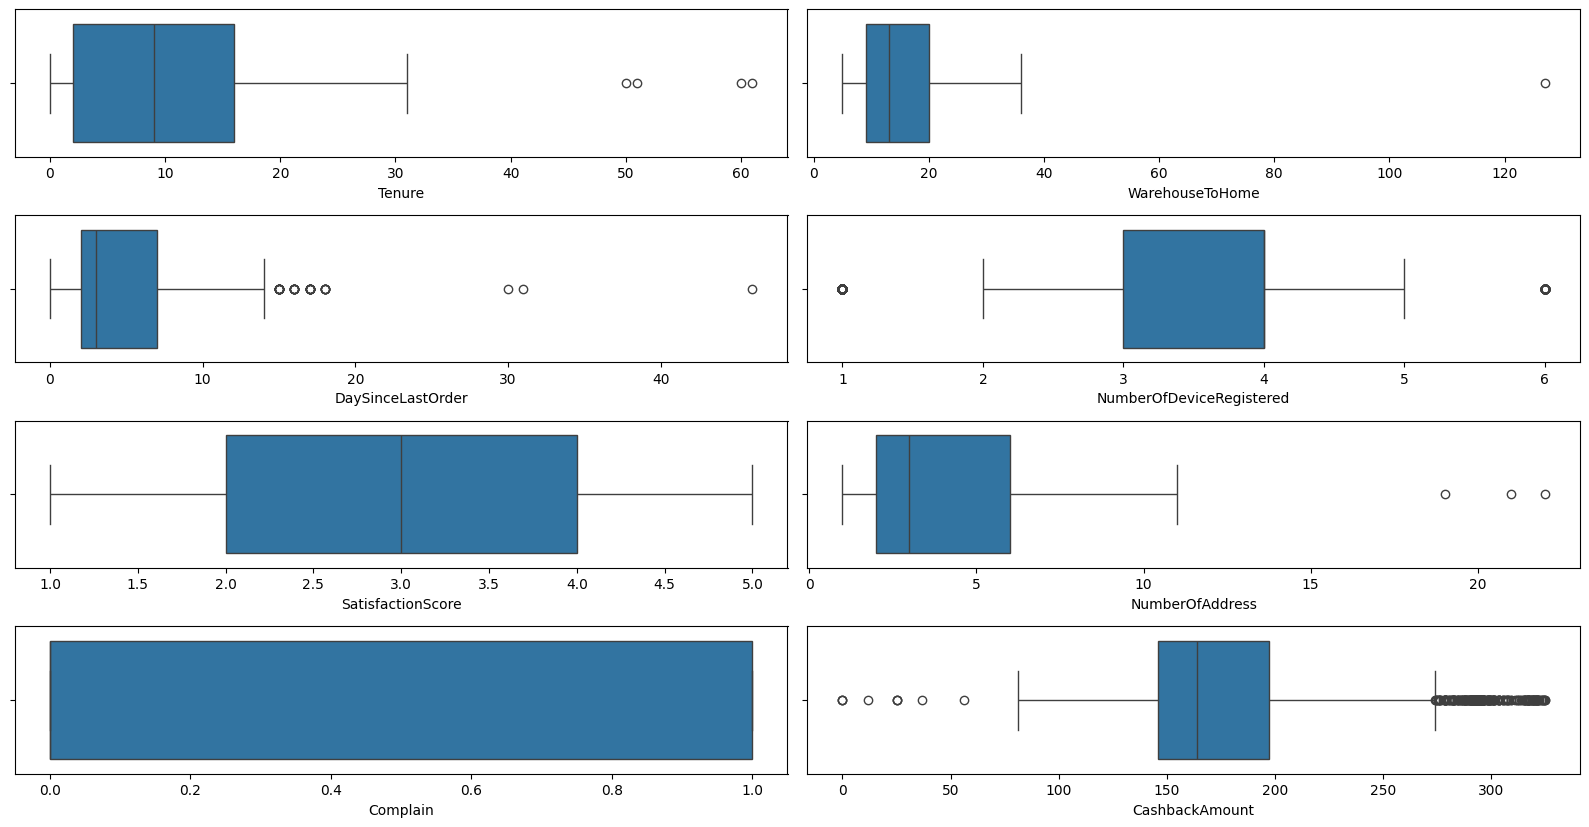

In [17]:
# Mendefinisikan kolom numerik untuk visualisasi
col_names = kolom_num
plotnumber = 1

plt.figure(figsize=(16, 10))

for kolom in col_names:
    plt.subplot(5, 2, plotnumber)
    sns.boxplot(data=df, x=kolom) 
    plt.tight_layout() 
    plotnumber += 1  


Dari boxplot di atas, terlihat bahwa beberapa kolom numerik memiliki outlier. Namun, kita anggap outlier tersebut bersifat natural, karena dalam konteks E-Commerce, hal ini sangat wajar terjadi. Artinya, data tersebut asli dan bukan akibat kesalahan saat input atau pengetikan.

> ### Setelah Data Cleaning

In [18]:
list_item = []
for col in df.columns:
    data_count = len(df[col].dropna()) 
    missing_value_count = df[col].isna().sum()
    missing_value_percentage = round((missing_value_count / len(df[col])) * 100, 2)
    unique_count = df[col].nunique()
    unique_sample = df[col].dropna().unique() 
    
    list_item.append([col, df[col].dtype, data_count, missing_value_count, missing_value_percentage, unique_count, unique_sample])

df_items_info = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
                                      'Missing Value %', 'Number of Unique', 'Unique Sample'],
                             data=list_item)

df_items_info.sort_values(by=['Data Type']).reset_index(drop=True)

,Column Name,Data Type,Data Count,Missing Value,Missing Value %,Number of Unique,Unique Sample
0,NumberOfDeviceRegistered,int64,3269,0,0.00,6,"[4, 3, 6, 2, 5, 1]"
1,SatisfactionScore,int64,3269,0,0.00,5,"[3, 1, 4, 2, 5]"
2,NumberOfAddress,int64,3269,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
3,Complain,int64,3269,0,0.00,2,"[0, 1]"
4,Churn,int64,3269,0,0.00,2,"[0, 1]"
5,Tenure,float64,3110,159,4.86,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
6,WarehouseToHome,float64,3134,135,4.13,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
7,DaySinceLastOrder,float64,3088,181,5.54,22,"[7.0, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0,..."
8,CashbackAmount,float64,3269,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."
9,PreferedOrderCat,object,3269,0,0.00,5,"[Laptop & Accessory, Mobile Phone, Fashion, Ot..."


- Masih terdapat missing value pada beberapa kolom, yang akan ditangani pada tahap preprocessing. Dengan demikian, setelah model tersimpan, tidak perlu lagi menangani missing value.
- Tidak ada lagi data yang tidak konsisten.
- Jumlah data berkurang dari 3941 menjadi 3269 setelah penghapusan duplikasi.

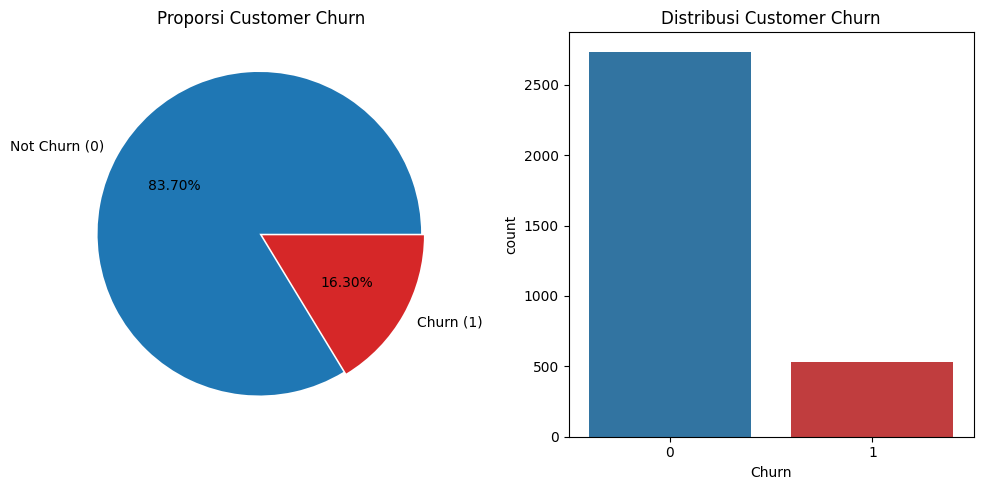

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(df['Churn'].value_counts(), labels=['Not Churn (0)', 'Churn (1)'], autopct='%.2f%%', explode=(0.01, 0.01), 
        colors=['#1f77b4', '#d62728'])
plt.title('Proporsi Customer Churn')

plt.subplot(1,2,2)
sns.countplot(x=df['Churn'], palette=['#1f77b4', '#d62728'])
plt.title('Distribusi Customer Churn')

plt.tight_layout()
plt.show()


- Setelah proses cleaning, target pada dataset ini masih berdistribusi timpang (*Imbalance*).
- Kelas 0 (tidak churn) mencakup 83,70% data, sementara kelas 1 (churn) hanya 16,30%.
- Ketidakseimbangan ini dapat mempengaruhi performa model dalam memprediksi kelas minoritas, sehingga perlu penanganan khusus pada tahap preprocessing.

### Distribusi data setiap kolom numerik

In [20]:
kolom = ['Churn', 'Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 
         'NumberOfDeviceRegistered', 'SatisfactionScore', 
         'NumberOfAddress', 'Complain', 'CashbackAmount']

distribusi = [
    'normal' if normaltest(df[i])[1] > 0.05 else 'tidak normal' 
    for i in kolom
]

pd.DataFrame({'Distribusi': distribusi}, index=kolom).T


,Churn,Tenure,WarehouseToHome,DaySinceLastOrder,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CashbackAmount
Distribusi,tidak normal,tidak normal,tidak normal,tidak normal,tidak normal,tidak normal,tidak normal,tidak normal,tidak normal


Semua kolom numerik tidak berdistribusi normal, yang berarti tidak ada perubahan dibandingkan dengan kondisi sebelumnya.

### **Perbandingan Churn per Data Numerikal Kontinu**

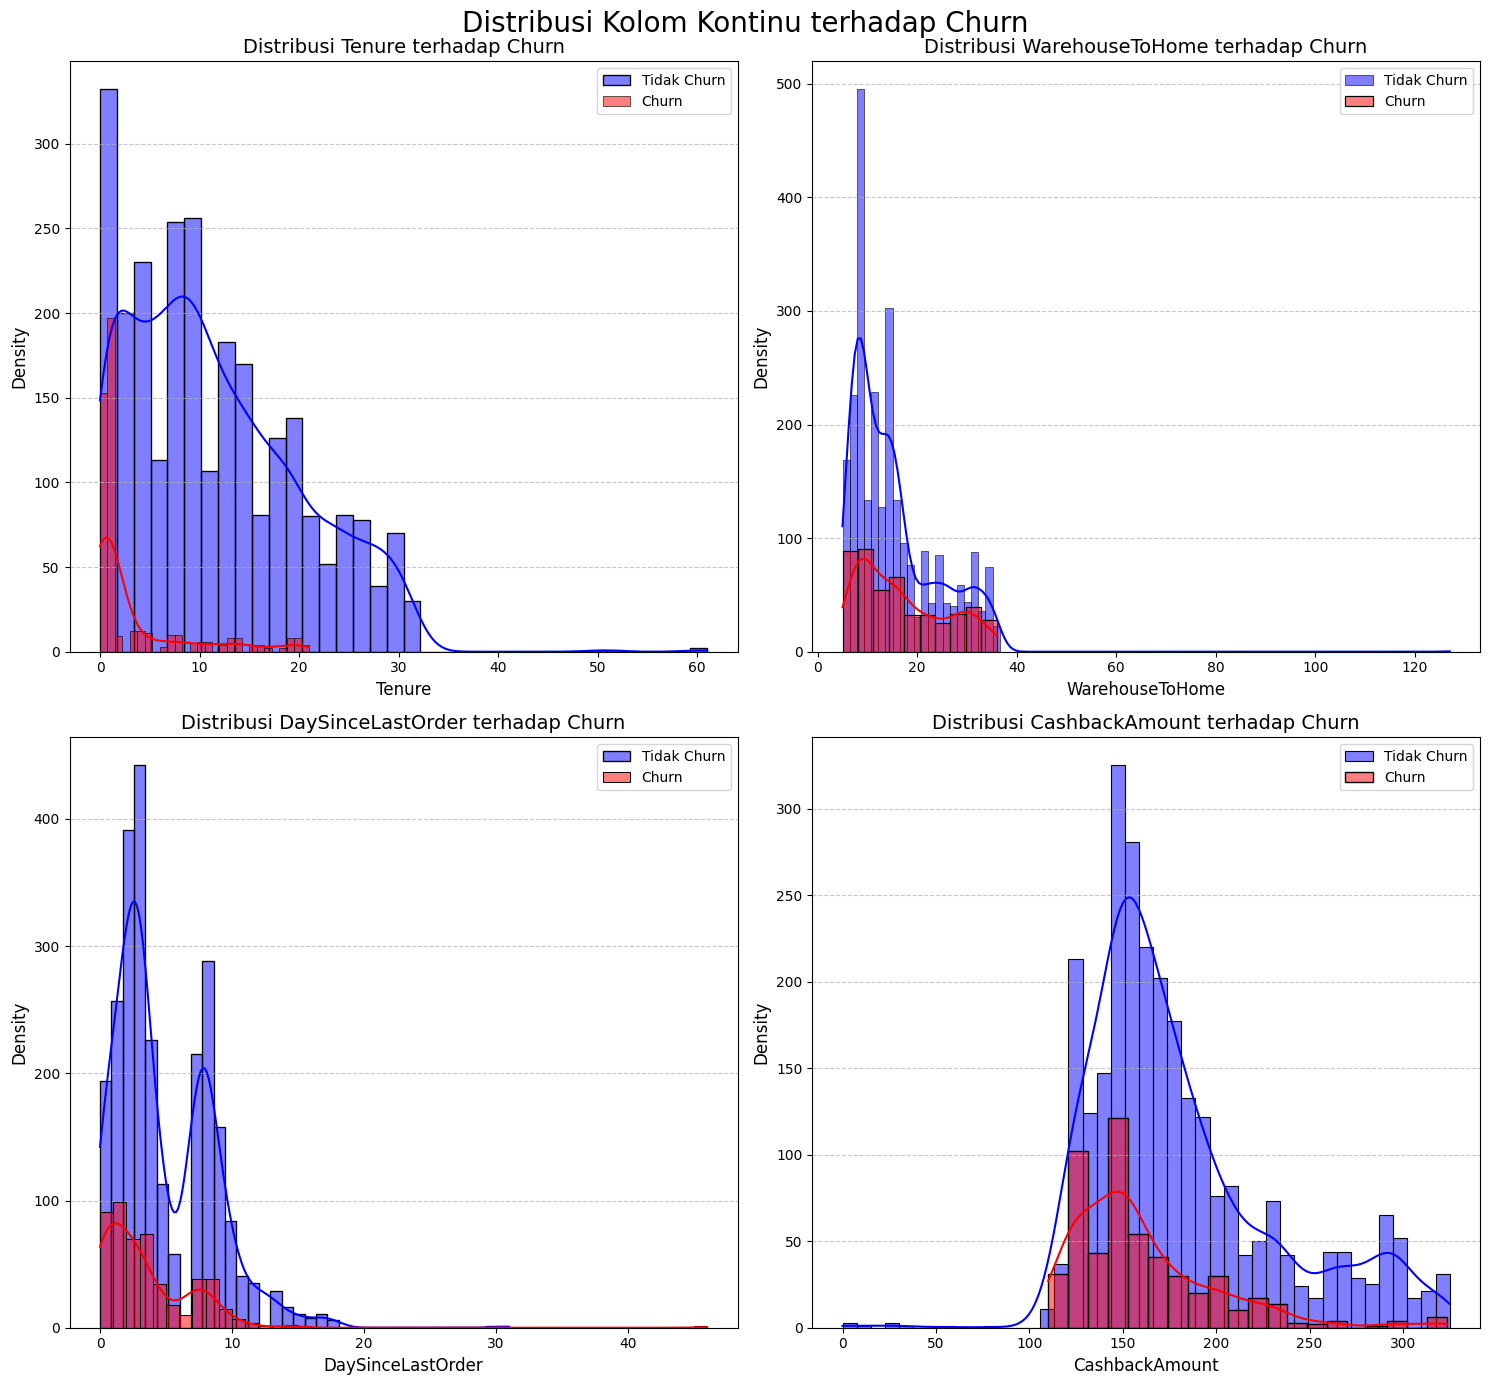

In [21]:
# Distribusi pada kolom kontinu terhadap churn
kontinu = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
sns.color_palette('pastel')
plt.figure(figsize=(15, 15))

for a, kolom in enumerate(kontinu, 1):
    plt.subplot(2, 2, a) 
    sns.histplot(x=df[df['Churn'] == 0][kolom], kde=True, color='blue', label='Tidak Churn')
    sns.histplot(x=df[df['Churn'] == 1][kolom], kde=True, color='red', label='Churn')
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.title(f'Distribusi {kolom} terhadap Churn', fontsize=14)
    plt.xlabel(kolom, fontsize=12)
    plt.ylabel('Density', fontsize=12)

plt.suptitle('Distribusi Kolom Kontinu terhadap Churn', fontsize=20, y=0.92)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


Analisis Fitur Numerikal Kontinu terhadap Churn

1. **Tenure:** Pelanggan dengan masa berlangganan pendek lebih cenderung churn. Hubungan negatif terlihat antara lama berlangganan dan churn.
2. **WarehouseToHome:** Jarak yang lebih jauh dari gudang ke rumah sedikit meningkatkan risiko churn.
3. **DaySinceLastOrder:** Interval waktu lebih lama sejak pesanan terakhir meningkatkan kemungkinan churn.
4. **CashbackAmount:** Pelanggan dengan cashback rendah lebih berisiko churn, menunjukkan cashback sebagai faktor retensi penting.

Kesimpulan

Semua fitur numerikal kontinu memiliki pengaruh terhadap churn.

### **Perbandingan Churn per Data Kategorikal dan Numerikal Discrete**

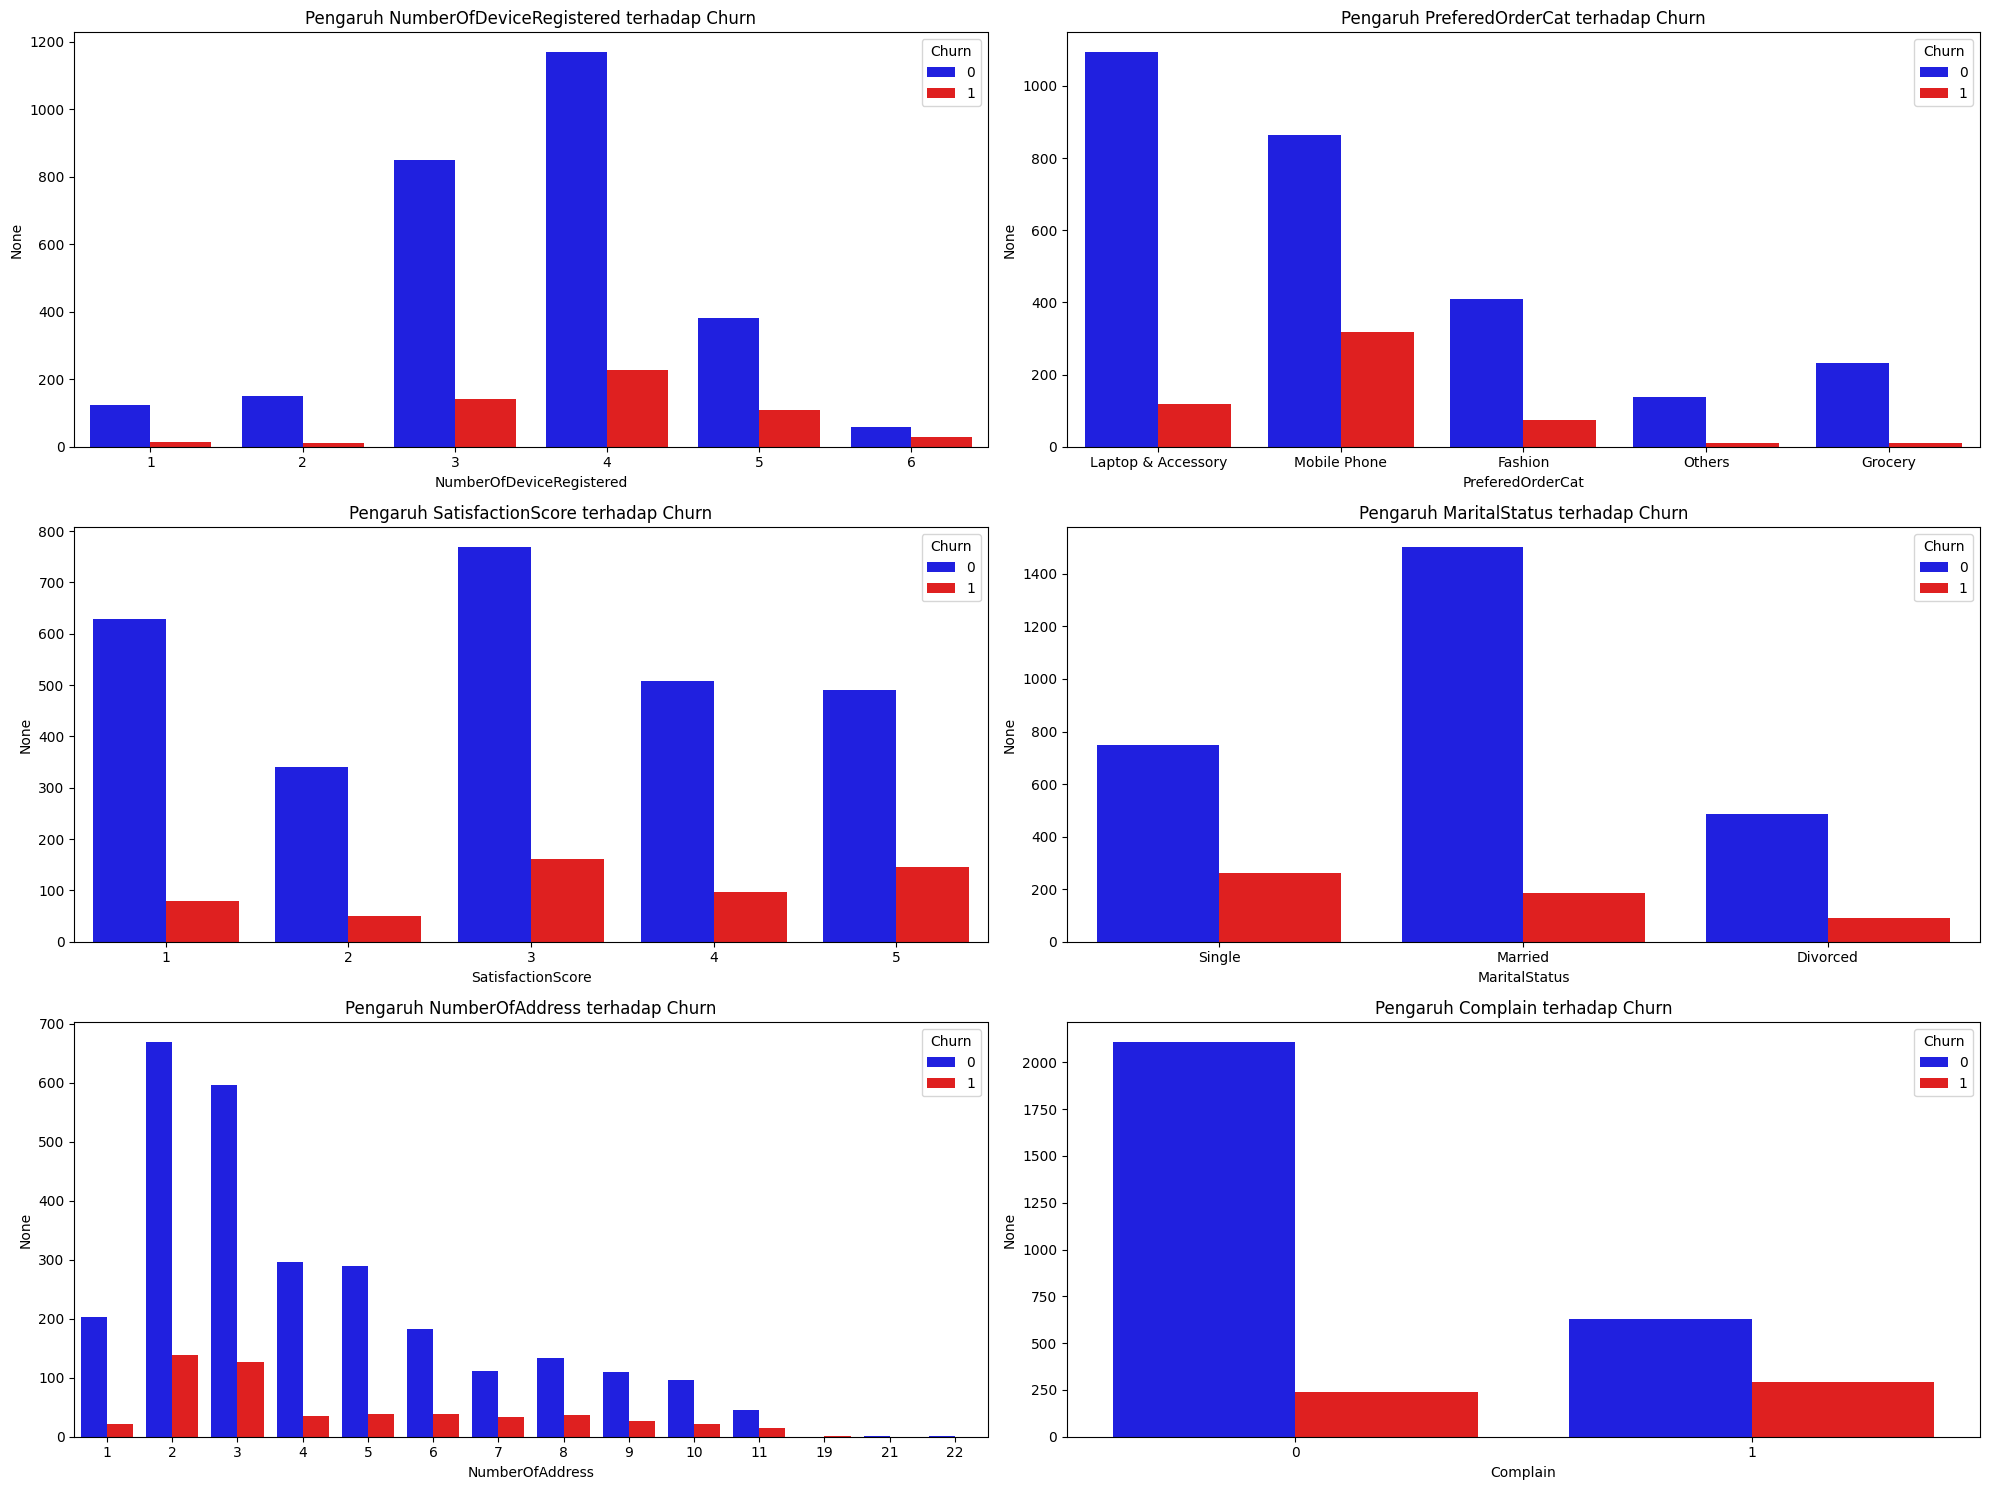

In [22]:
df_col = df[['NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 
             'NumberOfAddress', 'Complain', 'Churn']]

c = 1

plt.figure(figsize=(20, 15))

for i in df_col.columns:
    if i != 'Churn': 
        plt.subplot(3, 2, c) 
        sns.barplot(data=df_col, x=i, y=df.index, estimator=len, hue='Churn', palette=['blue', 'red']) 
        plt.title(f'Pengaruh {i} terhadap Churn') 
        c += 1

plt.tight_layout()
plt.show()


Analisis Fitur Kategorikal terhadap Churn

1. **NumberOfDeviceRegistered:** Pelanggan dengan 1-2 perangkat lebih cenderung churn dibandingkan pelanggan dengan perangkat lebih banyak.
2. **PreferedOrderCat:** Pelanggan kategori "Mobile Phone" dan "Fashion" memiliki tingkat churn yang lebih tinggi dibandingkan kategori lain.
3. **SatisfactionScore:** Skor kepuasan rendah (1-2) berkorelasi dengan tingkat churn yang lebih tinggi.
4. **MaritalStatus:** Pelanggan "Single" memiliki tingkat churn yang lebih tinggi dibandingkan "Married" atau "Divorced".
5. **NumberOfAddress:** Pelanggan dengan sedikit alamat terdaftar lebih cenderung churn.
6. **Complain:** Pelanggan dengan komplain memiliki kemungkinan churn yang lebih tinggi.

Kesimpulan

Fitur-fitur ini memiliki pengaruh terhadap churn.


**Jadi seluruh fitur akan digunakan dalam proses selanjutnya**

---
# D. Data Preprocessing & Feature Engineering

## Data Splitting

Karena setiap fitur berpengaruh, maka X awal akan didefinisikan menggunakan semua fitur yang ada.

In [23]:
X = df.drop(columns='Churn')
y = df['Churn']

In [24]:
display(X , y)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17
...,...,...,...,...,...,...,...,...,...,...
3264,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90
3265,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99
3266,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86
3267,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80


0       0
1       0
2       0
3       0
4       0
       ..
3264    0
3265    0
3266    0
3267    0
3268    0
Name: Churn, Length: 3269, dtype: int64

In [25]:
# Membagi dataset menjadi data latih (train) dan data uji (test) dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=1, 
    stratify=y 
)

print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)


X_train.shape: (2615, 10)
X_test.shape: (654, 10)


## Penjelasan Detail

### **1. Handling Missing Values**
- Kolom `Tenure`, `WarehouseToHome`, dan `DaySinceLastOrder` memiliki nilai kosong.
- Nilai kosong akan diisi menggunakan **KNN Imputer**, yang mencari sejumlah tetangga terdekat dan menghitung rata-rata untuk mengisi nilai kosong.
- **Kelebihan KNN Imputer:**
  - Mempertahankan nilai asli dataset.
  - Lebih presisi dibandingkan metode konvensional seperti mean atau median.

### **2. Encoding**
- Encoding diperlukan untuk mengonversi data kategorik menjadi numerik.
- Kolom yang akan diencoding:
  - `MaritalStatus` dengan 3 nilai unik.
  - `PreferedOrderCat` dengan 5 nilai unik.
- Karena data ini tidak memiliki tingkatan hierarki, maka digunakan **One Hot Encoding**.
- **Kelebihan One Hot Encoding:**
  - Mengubah data kategorik menjadi numerik tanpa kehilangan informasi.

### **3. Scaling**
- Scaling dilakukan untuk menyelaraskan skala antar fitur numerik.
- Kolom numerik yang akan diskalakan: `Tenure`, `WarehouseToHome`, `NumberOfDeviceRegistered`, `SatisfactionScore`, `NumberOfAddress`, `DaySinceLastOrder`, dan `CashbackAmount`.
- Kolom `Complain` tidak perlu diskalakan karena sudah berbentuk 0 dan 1.
- Digunakan **Robust Scaler** karena:
  - Menggunakan **Interquartile Range (IQR)**.
  - Efektif untuk data yang mengandung outlier.

### **4. Handling Imbalanced Data**
- Data imbalance terjadi ketika jumlah data pada kelas mayoritas jauh lebih banyak dibandingkan kelas minoritas.
- **Metode yang digunakan:**
  - **SMOTEENC:** Membuat data sintetis dari kelas minoritas.
  - **Class Weight:** Mengatur bobot kelas secara otomatis menggunakan `class_weight='balanced'` pada algoritma machine learning.



In [26]:
impute = Pipeline([
    ('KNN Imputer', KNNImputer(n_neighbors=10)),
    ('robust', RobustScaler()),
])

In [27]:
# Membuat kolom Transformasi
transformer = ColumnTransformer([
    ('One Hot Encoding', OneHotEncoder(drop='first', handle_unknown='ignore'), ['PreferedOrderCat', 'MaritalStatus']),
    ('Impute Robust', impute, ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore']),
], remainder='passthrough')

transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot Encoding',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('Impute Robust',
                                 Pipeline(steps=[('KNN Imputer',
                                                  KNNImputer(n_neighbors=10)),
                                                 ('robust', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount',
                                  'SatisfactionScore'])])

In [28]:
testing = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
testing.head()

,One Hot Encoding__PreferedOrderCat_Grocery,One Hot Encoding__PreferedOrderCat_Laptop & Accessory,One Hot Encoding__PreferedOrderCat_Mobile Phone,One Hot Encoding__PreferedOrderCat_Others,One Hot Encoding__MaritalStatus_Married,One Hot Encoding__MaritalStatus_Single,Impute Robust__Tenure,Impute Robust__WarehouseToHome,Impute Robust__NumberOfDeviceRegistered,Impute Robust__NumberOfAddress,Impute Robust__DaySinceLastOrder,Impute Robust__CashbackAmount,Impute Robust__SatisfactionScore,remainder__Complain
0,0.0,1.0,0.0,0.0,0.0,0.0,0.769231,-0.512821,-1.0,-0.50,0.8,-0.304863,0.5,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,-0.615385,0.000000,-1.0,-0.25,0.8,-0.033510,0.5,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,-0.538462,-0.427350,1.0,-0.25,-0.2,0.003081,-1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,-0.538462,-0.512821,-1.0,0.50,0.2,-0.295234,0.5,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.461538,0.256410,1.0,1.50,0.2,0.570823,0.5,0.0


# E. Modeling

## Benchmark Model

Beberapa variasi yang akan dicoba untuk menemukan model terbaik, antara lain:
- Cross Validation untuk semua model
- Balancing & Resampling data: RandomOverSampling, SMOTEENC, Class Weight = `balanced`
- Feature Selection
- Model yang dicoba: Logistic Regression, KNN, Decision Tree, Random Forest, Gradient Boost, Ada Boost, Xtreme Gradient Boost, Light Gradient Boost, dan SVC


### Beberapa model yang akan dicoba:

| **Model**                 | **Alasan**                                                                                       | **Tujuan**                                                                                     |
|---------------------------|--------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| **Logistic Regression**   | Sederhana, mudah diimplementasikan dan diinterpretasikan. Cocok untuk data linear.              | Membuat baseline model untuk membandingkan performa dengan model lain.                       |
| **K-Nearest Neighbors**   | Instance-based learning, tidak memerlukan asumsi distribusi data, cocok untuk data non-linear.  | Mengevaluasi pola data berdasarkan tetangga terdekat.                                         |
| **Decision Tree**         | Mudah diinterpretasikan, menangani data non-linear, dan dapat digunakan pada data dengan missing value. | Mengevaluasi performa model dasar sebagai pembanding untuk metode ensemble.                  |
| **Random Forest**         | Metode ensemble untuk mengurangi overfitting dengan menggabungkan banyak Decision Tree.         | Menangkap pola data yang kompleks dengan akurasi lebih tinggi dibandingkan Decision Tree.     |
| **AdaBoost**              | Memperkuat performa model dasar (Decision Tree) dengan memprioritaskan pengamatan sulit.         | Meningkatkan akurasi pada dataset dengan outlier atau pengamatan yang sulit diklasifikasikan. |
| **Gradient Boosting**     | Meningkatkan performa secara iteratif dengan meminimalkan loss pada model sebelumnya.            | Membuat model prediktif yang kuat dengan menangkap hubungan non-linear yang kompleks.         |
| **XGBoost**               | Optimasi Gradient Boosting, lebih cepat, mendukung regularisasi untuk mencegah overfitting.     | Meningkatkan performa untuk data besar atau kompleks dengan tuning hyperparameter.            |
| **LightGBM**              | Versi lebih cepat dari Gradient Boosting, cocok untuk data dengan dimensi besar dan kategori tinggi. | Membuat model yang efisien untuk data besar dengan performa tinggi.                          |
| **Support Vector Classifier** | Efektif untuk data non-linear dengan kernel trick, cocok untuk dataset kecil dan fitur kompleks.   | Membuat model yang memaksimalkan margin antara kelas untuk klasifikasi yang akurat.           |


### a. Perbandingan penggunaan Class Weight

In [29]:
# metrics
f2_score = make_scorer(fbeta_score, beta=2)

**Model Benchmark: Tanpa Class Weight**

In [30]:
logreg = LogisticRegression(random_state=1)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=1) 
rf = RandomForestClassifier(random_state=1) 
ada = AdaBoostClassifier(tree, random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
lgb = LGBMClassifier(random_state=1)
svc = SVC(random_state=1)

In [31]:
models = [logreg, knn, tree, rf, ada, gbc, xgb, lgb, svc]
score= []
avg= []
std= []

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess', transformer),
        ('model', i)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator,
                             X_train,
                             y_train,
                             cv=skfold,
                             scoring=f2_score)
    score.append(model_cv)
    avg.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost','XGBoost', 'LightGBM', 'SCV'],
                'mean f2 score train': avg,
                'sdev': std,
}).set_index('model').sort_values(by='mean f2 score train', ascending=False)

[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.162906 -> initscore=-1.636761
[LightGBM] [Info] Start training from score -1.636761
[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 14
[LightGBM] [Info] [binary:Bo

,mean f2 score train,sdev
model,,
XGBoost,0.675236,0.050596
Decision Tree,0.665599,0.040977
LightGBM,0.665223,0.051377
AdaBoost,0.661443,0.038593
GBoost,0.601093,0.029083
Random Forest,0.590111,0.023927
Logistic Regression,0.490265,0.038641
SCV,0.419291,0.040550
KNN,0.407392,0.036661


**Model Benchmark: Dengan Class Weight**

In [32]:
logreg = LogisticRegression(random_state=1, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=1, class_weight='balanced') 
rf = RandomForestClassifier(random_state=1, class_weight='balanced') 
ada = AdaBoostClassifier(tree, random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
lgb = LGBMClassifier(random_state=1, class_weight='balanced')
svc = SVC(random_state=1, class_weight='balanced')

In [33]:
models = [logreg, knn, tree, rf, ada, gbc, xgb, lgb, svc]
score= []
avg= []
std= []

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess', transformer),
        ('model', i)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator, 
                             X_train,
                             y_train,
                             cv=skfold,
                             scoring=f2_score)
    score.append(model_cv)
    avg.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost','XGBoost', 'LightGBM','SVC'],
                'mean f2 score train': avg,
                'sdev': std,
}).set_index('model').sort_values(by='mean f2 score train', ascending=False)

[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 14
[LightGBM] [Info] [binary:Boos

,mean f2 score train,sdev
model,,
LightGBM,0.763168,0.026857
SVC,0.722666,0.019986
Logistic Regression,0.697576,0.013819
XGBoost,0.675236,0.050596
AdaBoost,0.670166,0.061713
Decision Tree,0.652253,0.045227
GBoost,0.601093,0.029083
Random Forest,0.573852,0.033563
KNN,0.407392,0.036661


Penggunaan `class_weight = balance` pada model menghasilkan F2 score yang lebih tinggi dibandingkan tanpa pengaturan tersebut. Data yang imbalanced mempengaruhi kemampuan model dalam memprediksi kelas minoritas (kelas 1, churn). Tanpa `class_weight`, dataset tetap imbalanced, namun dengan pengaturan ini, model dapat mengatasi ketidakseimbangan, sehingga performa model menjadi lebih baik. Oleh karena itu, ke depannya kita akan menggunakan `class_weight = balance`.


### c. Model Evaluation

In [34]:
score_f2= []
models= [logreg, knn, tree, rf, ada, gbc, xgb, lgb, svc]

for i in models:
    estimator=Pipeline([
        ('preprocess', transformer),
        ('model', i)])
            
    estimator = estimator.fit(X_train, y_train)

    y_predict = estimator.predict(X_test)
    score_f2.append(fbeta_score(y_test,
                                y_predict,
                                beta=2))
                
df_test = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost','XGBoost', 'LightGBM', 'SVC'],
            'f2 score test':score_f2}).set_index('model')

df_test.sort_values(by='f2 score test', ascending=False)

[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


,f2 score test
model,
LightGBM,0.769928
SVC,0.761589
Logistic Regression,0.722135
XGBoost,0.719697
AdaBoost,0.676190
Decision Tree,0.659656
Random Forest,0.636183
GBoost,0.595238
KNN,0.465587


Setelah melakukan scoring pada data Train dengan variasi:
1. Tanpa metode tambahan
2. Dengan class weight = 'balanced'

Yang diambil adalah dengan poin berikut:
- F2 score terbaik didapatkan oleh model LGBM dengan class weight = 'balanced', yaitu 0.763168.
- Hasil scoring pada data Test menunjukkan LGBM dengan F2 score tertinggi yaitu 0.769928.
- Model LGBM dengan class weight = 'balanced' akan digunakan pada tahap selanjutnya.


### d. Perbandingan penggunaan Feature Selection

**Model Benchmark: Feature Selection (RFE)**

In [35]:
# Feature Selection
rfe_rf = RFE(estimator=RandomForestClassifier(), n_features_to_select=13)
rfe_lr = RFE(estimator=LogisticRegression(), n_features_to_select=13)

In [36]:
feat_sel = [rfe_rf, rfe_lr, None]
score= []
avg= []
std= []


for j in feat_sel:
    skfold= StratifiedKFold(n_splits=5)
    estimator= Pipeline([
        ('preprocess', transformer),
        ('feature selection', j),
        ('model', lgb)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator,
                             X_train,
                             y_train,
                             cv=skfold,
                             scoring=f2_score)
    score.append(model_cv)
    avg.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['RF LightGBM', 'LR LightGBM', 'LGBM'],
                'mean f2 score train':avg,
                'sdev': std,
}).set_index('model').sort_values(by='mean f2 score train', ascending=False)

[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [In

,mean f2 score train,sdev
model,,
RF LightGBM,0.763168,0.026857
LGBM,0.763168,0.026857
LR LightGBM,0.751830,0.041324


Feature Selection dapat mempengaruhi performa model. Setelah eksperimen, parameter `n_features_to_select` = 13 menghasilkan skor tertinggi dan digunakan untuk benchmarking. Hasilnya, model dengan feature selection menggunakan RFE (Recursive Feature Elimination) dengan estimator = RandomForestClassifier() memiliki skor yang sama dengan model tanpa RFE. Oleh karena itu akan terus mencoba kedua metode (dengan dan tanpa feature selection) untuk mencari skor tertinggi.


### e. Perbandingan penggunaan resampling

In [37]:
# balancer
smote = SMOTEENN(random_state=1)
ros = RandomOverSampler(random_state=1)

In [38]:
resampler = [smote, ros, None]
score= []
avg= []
std= []

for k in resampler:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess', transformer),
        ('resampler', k),
        ('model', lgb)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator,
                             X_train,
                             y_train,
                             cv=skfold,
                             scoring=f2_score)
    score.append(model_cv)
    avg.append(model_cv.mean())
    std.append(model_cv.std())
        
df_res_train = pd.DataFrame({'model': ['lgb_smote',
                                       'lgb_ros',
                                       'lgb'],
                'mean f2 score train':avg,
                'sdev':std,
})

df_res_train.set_index('model').sort_values(by='mean f2 score train', ascending=False)

[LightGBM] [Info] Number of positive: 2056, number of negative: 1654
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2007
[LightGBM] [Info] Number of data points in the train set: 3710, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 1656, number of negative: 1308
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2003
[LightGBM] [Info] Number of data points in the train set: 2964, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM

,mean f2 score train,sdev
model,,
lgb_ros,0.770695,0.035916
lgb,0.763168,0.026857
lgb_smote,0.732833,0.030483


In [39]:
resampler = [smote, ros, None]
score= []
avg= []
std= []

for k in resampler:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess', transformer),
        ('feature selection', rfe_rf),
        ('resampler', k),
        ('model', lgb)])
    estimator = estimator.fit(X_train, y_train)
    model_cv=cross_val_score(estimator,
                             X_train,
                             y_train,
                             cv=skfold,
                             scoring=f2_score)
    score.append(model_cv)
    avg.append(model_cv.mean())
    std.append(model_cv.std())
        
df_res_train_rf = pd.DataFrame({'model': ['lgb_smote_rf',
                                       'lgb_ros_rf',
                                       'lgb_rf'],
                'mean f2 score train':avg,
                'sdev':std,
})

df_res_train_rf.set_index('model').sort_values(by='mean f2 score train', ascending=False)

[LightGBM] [Info] Number of positive: 2054, number of negative: 1654
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2002
[LightGBM] [Info] Number of data points in the train set: 3708, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 1656, number of negative: 1310
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1998
[LightGBM] [Info] Number of data points in the train set: 2966, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] 

,mean f2 score train,sdev
model,,
lgb_ros_rf,0.763479,0.033203
lgb_rf,0.763168,0.026857
lgb_smote_rf,0.733094,0.019305


Pada Data Train, model tanpa proses resampling menghasilkan skor yang lebih baik dibandingkan dengan menggunakan resampling. Hal yang sama juga berlaku pada model tanpa RFE, yang lebih baik dibandingkan dengan menggunakan RFE.


### f. Model evaluation

In [40]:
resampler= [smote, ros, None]
score_f2= []


for k in resampler:
    estimator=Pipeline([
        ('preprocess', transformer),
        ('resampler', k),
        ('model', lgb)])
            
    estimator = estimator.fit(X_train, y_train)

    y_predict = estimator.predict(X_test)
    score_f2.append(fbeta_score(y_test,
                                y_predict,
                                beta=2))
                
df_res_test = pd.DataFrame({'model':['lgb_smote', 'lgb_ros', 'lgb'],
            'f2 score test':score_f2}).set_index('model')

df_res_test.sort_values(by='f2 score test', ascending=False)

[LightGBM] [Info] Number of positive: 2056, number of negative: 1654
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2007
[LightGBM] [Info] Number of data points in the train set: 3710, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 472
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM]

,f2 score test
model,
lgb_ros,0.801457
lgb_smote,0.776614
lgb,0.769928


In [41]:
resampler= [smote, ros, None]
score_f2= []


for k in resampler:
    estimator=Pipeline([
        ('preprocess', transformer),
        ('feature selection', rfe_rf),
        ('resampler', k),
        ('model', lgb)])
            
    estimator = estimator.fit(X_train,y_train)

    y_predict = estimator.predict(X_test)
    score_f2.append(fbeta_score(y_test,
                                y_predict,
                                beta=2))
                
df_res_test_rf = pd.DataFrame({'model':['lgb_smote_rf', 'lgb_ros_rf', 'lgb_rf'],
            'f2 score test':score_f2}).set_index('model')

df_res_test_rf.sort_values(by='f2 score test', ascending=False)

[LightGBM] [Info] Number of positive: 2054, number of negative: 1654
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2002
[LightGBM] [Info] Number of data points in the train set: 3708, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 470
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM]

,f2 score test
model,
lgb_ros_rf,0.798165
lgb_smote_rf,0.777972
lgb_rf,0.769928


- Pada data train, model LGBM tanpa resampling menghasilkan performa terbaik dibandingkan model lainnya.
- Namun, pada data Test, model dengan resampling RandomOverSampling memiliki performa terbaik.
- Karena belum ada model yang konsisten terbaik, maka akan melakukan tuning pada:
  1. LGBM tanpa Resampling
  2. LGBM dengan RandomOverSampling
  3. LGBM dengan SMOTEENC

---
# F. Hyperparamater Tuning

LightGBM adalah framework gradient boosting yang menggunakan algoritma pembelajaran berbasis pohon keputusan.


In [42]:
pd.DataFrame([lgb.get_params()])

,boosting_type,class_weight,colsample_bytree,importance_type,learning_rate,max_depth,min_child_samples,min_child_weight,min_split_gain,n_estimators,n_jobs,num_leaves,objective,random_state,reg_alpha,reg_lambda,subsample,subsample_for_bin,subsample_freq
0,gbdt,balanced,1.0,split,0.1,-1,20,0.001,0.0,100,None,31,None,1,0.0,0.0,1.0,200000,0


**Parameter yang akan dituning**

1. `min_data_in_leaf` = Menentukan jumlah minimal data pada setiap daun pohon untuk mencegah overfitting. Nilai yang terlalu besar dapat menghindari pohon yang terlalu dalam namun berisiko overfitting.
2. `max_bin` = Menentukan jumlah maksimum tempat sampah untuk nilai fitur. Mengurangi `max_bin` dapat mempercepat waktu pelatihan.
3. `num_leaves` = Mengatur jumlah maksimum node per pohon. Mengurangi `num_leaves` akan mengurangi kompleksitas pohon dan mempercepat waktu pelatihan.
4. `num_iterations` = Mengontrol jumlah putaran boosting (jumlah pohon). Mengurangi ini akan mengurangi waktu pelatihan.
5. `learning_rate` = Tidak mempengaruhi waktu pelatihan, tetapi mempengaruhi akurasi. Jika `num_iterations` dikurangi, `learning_rate` harus ditingkatkan.


**Hyperparameter LGMB dengan RandomOverSampler**


In [43]:
# LightGBM Hyperparameter Tuning

lgb = LGBMClassifier(random_state=1, class_weight='balanced')

clf = imblearn.pipeline.Pipeline(steps=[
    ("Transformation",transformer),
    ('resampler',ros),
    ("model", lgb)
  ], verbose=True)

hyperparam_space=[{
    'model__max_bin': [275, 300],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15],
    'model__num_iterations':[100, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
}]

lgb_grid_ros = GridSearchCV(estimator = clf,
                      param_grid = hyperparam_space, 
                      cv = skfold, 
                      scoring = f2_score,
                      n_jobs=-1)

lgb_grid_ros.fit(X_train, y_train)      

[Pipeline] .... (step 1 of 3) Processing Transformation, total=   0.1s
[Pipeline] ......... (step 2 of 3) Processing resampler, total=   0.0s
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 517
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.0s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('Impute '
                                                                         'Robust',
                                                                         Pipeline(steps=[('KNN '
                                                                                          'Imputer',
                                                                                          KNNImputer(n...
                                       ('model',
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=1))],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
                          'model__max_bin': [275, 300],
                          'model__min_data_in_leaf': [20, 15],
                          'model__num_iterations': [100, 125, 150],
                          'model__num_leaves': [31, 21, 41, 51]}],
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [44]:
# create dataframe
pd.DataFrame(lgb_grid_ros.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_bin,param_model__min_data_in_leaf,param_model__num_iterations,param_model__num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
37,0.517634,0.086543,0.019033,0.001107,0.10,300,15,100,21,"{'model__learning_rate': 0.1, 'model__max_bin'...",0.814220,0.782313,0.808656,0.747126,0.765766,0.783616,0.025359,1
189,0.760168,0.029967,0.017899,0.001941,0.05,300,15,150,21,"{'model__learning_rate': 0.05, 'model__max_bin...",0.799550,0.792411,0.791855,0.736961,0.777778,0.779711,0.022510,2
41,0.631654,0.021191,0.019730,0.002667,0.10,300,15,125,21,"{'model__learning_rate': 0.1, 'model__max_bin'...",0.812065,0.781609,0.799087,0.719258,0.775281,0.777460,0.031858,3


In [45]:
print('LightGBM ROS')
print('Best_score:', lgb_grid_ros.best_score_)
print('Best_params:', lgb_grid_ros.best_params_)

LightGBM ROS
Best_score: 0.7836162695300303
Best_params: {'model__learning_rate': 0.1, 'model__max_bin': 300, 'model__min_data_in_leaf': 15, 'model__num_iterations': 100, 'model__num_leaves': 21}


**Hyperparameter LGMB dengan SMOTEENC**

In [46]:
# LightGBM Hyperparameter Tuning

lgb = LGBMClassifier(random_state=1, class_weight='balanced')

clf = imblearn.pipeline.Pipeline(steps=[
    ("Transformation", transformer),
    ('resampler', smote),
    ("model", lgb)
  ],verbose= True)

hyperparam_space=[{
    'model__max_bin': [275, 300],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15],
    'model__num_iterations':[100, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
}]

lgb_grid_smote = GridSearchCV(estimator = clf,
                      param_grid = hyperparam_space, 
                      cv = skfold, 
                      scoring = f2_score,
                      n_jobs=-1)

lgb_grid_smote.fit(X_train,y_train)      

[Pipeline] .... (step 1 of 3) Processing Transformation, total=   0.1s
[Pipeline] ......... (step 2 of 3) Processing resampler, total=   0.3s
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 2056, number of negative: 1654
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2146
[LightGBM] [Info] Number of data points in the train set: 3710, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.3s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('Impute '
                                                                         'Robust',
                                                                         Pipeline(steps=[('KNN '
                                                                                          'Imputer',
                                                                                          KNNImputer(n...
                                       ('model',
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=1))],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
                          'model__max_bin': [275, 300],
                          'model__min_data_in_leaf': [20, 15],
                          'model__num_iterations': [100, 125, 150],
                          'model__num_leaves': [31, 21, 41, 51]}],
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [47]:
# create dataframe
pd.DataFrame(lgb_grid_smote.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_bin,param_model__min_data_in_leaf,param_model__num_iterations,param_model__num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
103,2.009753,0.033406,0.018695,0.003725,0.125,275,20,125,51,"{'model__learning_rate': 0.125, 'model__max_bi...",0.798226,0.748899,0.739910,0.761589,0.764045,0.762534,0.019874,1
111,1.995212,0.124834,0.019059,0.002468,0.125,275,15,100,51,"{'model__learning_rate': 0.125, 'model__max_bi...",0.794702,0.726872,0.751121,0.770925,0.747768,0.758278,0.022955,2
115,2.025521,0.077978,0.022183,0.001688,0.125,275,15,125,51,"{'model__learning_rate': 0.125, 'model__max_bi...",0.792952,0.726872,0.751121,0.772627,0.747768,0.758268,0.022610,3


In [48]:
print('LightGBM SMOTEENC')
print('Best_score:', lgb_grid_smote.best_score_)
print('Best_params:', lgb_grid_smote.best_params_)

LightGBM SMOTEENC
Best_score: 0.7625339008378
Best_params: {'model__learning_rate': 0.125, 'model__max_bin': 275, 'model__min_data_in_leaf': 20, 'model__num_iterations': 125, 'model__num_leaves': 51}


**Hyperparameter LGMB tanpa Resampler**

In [49]:
# LightGBM Hyperparameter Tuning

lgb = LGBMClassifier(random_state=1, class_weight='balanced')

clf = imblearn.pipeline.Pipeline(steps=[
    ("Transformation", transformer),
    ("model", lgb)
  ],verbose= True)

hyperparam_space=[{
    'model__max_bin': [275, 300],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15],
    'model__num_iterations':[100, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
}]

lgb_grid = GridSearchCV(estimator = clf,
                      param_grid = hyperparam_space, 
                      cv = skfold, 
                      scoring = f2_score,
                      n_jobs=-1)

lgb_grid.fit(X_train,y_train)      

[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.1s
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 471
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('Impute '
                                                                         'Robust',
                                                                         Pipeline(steps=[('KNN '
                                                                                          'Imputer',
                                                                                          KNNImputer(n...
                                       ('model',
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=1))],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
                          'model__max_bin': [275, 300],
                          'model__min_data_in_leaf': [20, 15],
                          'model__num_iterations': [100, 125, 150],
                          'model__num_leaves': [31, 21, 41, 51]}],
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [50]:
pd.DataFrame(lgb_grid.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_bin,param_model__min_data_in_leaf,param_model__num_iterations,param_model__num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
60,0.751682,0.112028,0.019844,0.000643,0.075,275,15,100,31,"{'model__learning_rate': 0.075, 'model__max_bi...",0.794931,0.788288,0.823928,0.729167,0.775281,0.782319,0.030986,1
177,1.287278,0.062424,0.036363,0.004301,0.050,300,20,150,21,"{'model__learning_rate': 0.05, 'model__max_bin...",0.795964,0.761589,0.820399,0.759637,0.770925,0.781703,0.023274,2
25,0.511141,0.062155,0.019407,0.001868,0.100,300,20,100,21,"{'model__learning_rate': 0.1, 'model__max_bin'...",0.800915,0.770089,0.816555,0.729167,0.785398,0.780425,0.029947,3


In [51]:
print('LightGBM')
print('Best_score:', lgb_grid.best_score_)
print('Best_params:', lgb_grid.best_params_)

LightGBM
Best_score: 0.7823188989288833
Best_params: {'model__learning_rate': 0.075, 'model__max_bin': 275, 'model__min_data_in_leaf': 15, 'model__num_iterations': 100, 'model__num_leaves': 31}


In [52]:
# Memilih model terbaik
lgb_tuning_ros = lgb_grid_ros.best_estimator_
lgb_tuning_smote = lgb_grid_smote.best_estimator_
lgb_tuning = lgb_grid.best_estimator_

# Fitting model
lgb_tuning_ros.fit(X_train, y_train)
lgb_tuning_smote.fit(X_train, y_train)
lgb_tuning.fit(X_train, y_train)

# Prediksi
y_pred_lgb_tuning_ros = lgb_tuning_ros.predict(X_test)
y_pred_lgb_tuning_smote = lgb_tuning_smote.predict(X_test)
y_pred_lgb_tuning = lgb_tuning.predict(X_test)

# Menghitung f2 score
f2_lgb_tuning_ros = fbeta_score(y_test, y_pred_lgb_tuning_ros, beta=2)
f2_lgb_tuning_smote = fbeta_score(y_test, y_pred_lgb_tuning_smote, beta=2)
f2_lgb_tuning = fbeta_score(y_test, y_pred_lgb_tuning, beta=2)


[Pipeline] .... (step 1 of 3) Processing Transformation, total=   0.1s
[Pipeline] ......... (step 2 of 3) Processing resampler, total=   0.0s
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 517
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.1s
[Pipeline] .... (step 1 of 3) Processing Transformation, total=   0.1s
[Pipeline] ......... (step 2 of 3) Pr

In [53]:
print(f'F2 Score LGBM ROS         :', f2_lgb_tuning_ros)
print(f'F2 Score LGBM SMOTEENC    :', f2_lgb_tuning_smote)
print(f'F2 Score LGBM             :', f2_lgb_tuning)

F2 Score LGBM ROS         : 0.7832422586520947
F2 Score LGBM SMOTEENC    : 0.7876106194690266
F2 Score LGBM             : 0.8018018018018018


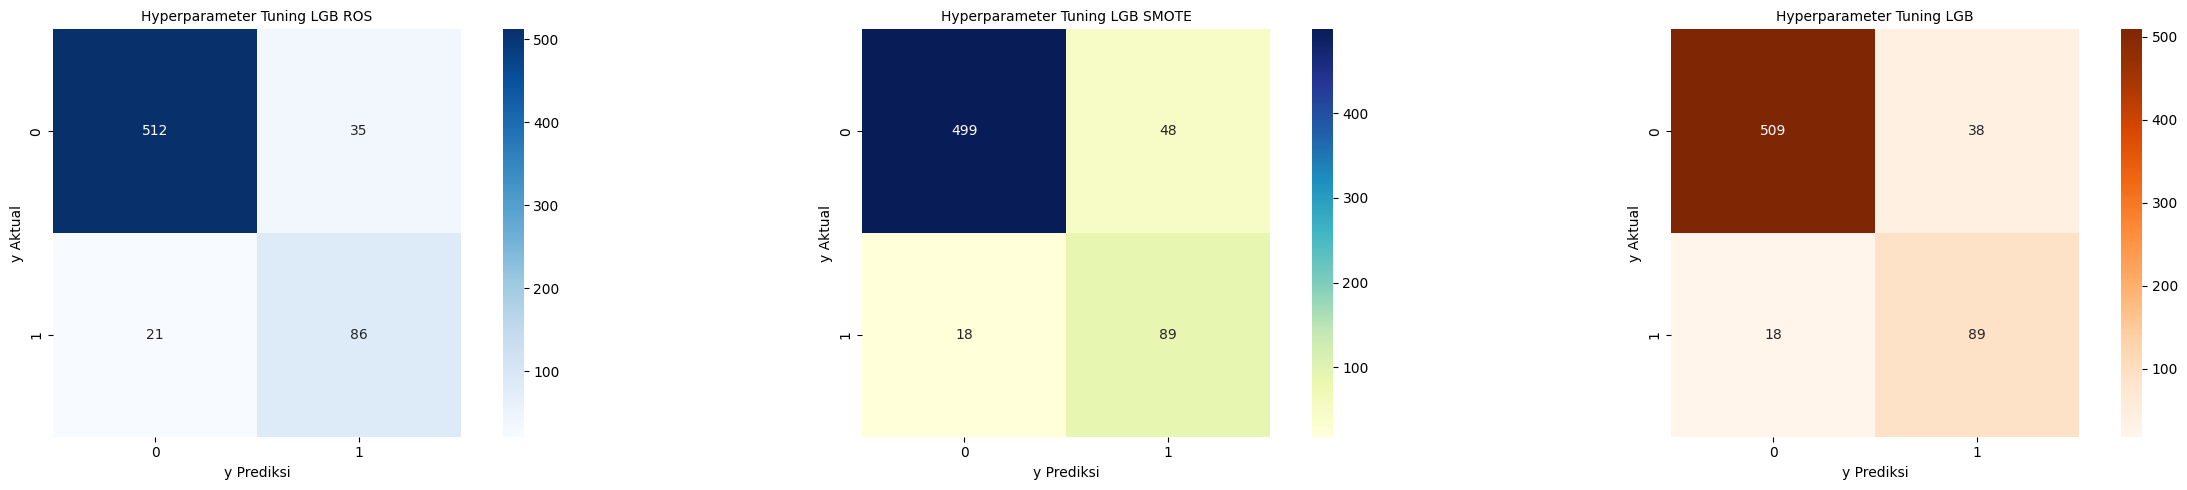

In [54]:
# Visualisasi Confusion Matrix untuk setiap model
plt.figure(figsize=(25,5))

# Confusion Matrix untuk model dengan RandomOverSampling (ROS)
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test, y_pred_lgb_tuning_ros), annot=True, fmt='.0f', square=True, cmap="Blues")
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title(f'Hyperparameter Tuning LGB ROS', size=10)

# Confusion Matrix untuk model dengan SMOTE
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test, y_pred_lgb_tuning_smote), annot=True, fmt='.0f', square=True, cmap="YlGnBu")
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title(f'Hyperparameter Tuning LGB SMOTE', size=10)

# Confusion Matrix untuk model tanpa resampling
plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test, y_pred_lgb_tuning), annot=True, fmt='.0f', square=True, cmap="Oranges")
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title(f'Hyperparameter Tuning LGB', size=10)

# Menyusun layout dan menampilkan plot
plt.tight_layout()
plt.show()


Benchmarking di atas menggunakan parameter yang sama untuk setiap model, dan didapatkan nilai tertinggi pada test set yaitu LGBM tanpa resampling dengan skor 0.8018. Hal ini wajar karena model sudah menggunakan `class_weight='balanced'` untuk menangani data imbalanced, sehingga tidak diperlukan resampling. Selanjutnya, model LGBM tanpa resampling akan dituning untuk meningkatkan performa lebih lanjut.

**Hyperparameter tuning V2.0 LGBM tanpa Resampling**

In [55]:
# LightGBM Hyperparameter Tuning

lgb = LGBMClassifier(random_state=1, class_weight='balanced')

clf = imblearn.pipeline.Pipeline(steps=[
    ("Transformation",transformer),
    ("model", lgb)
  ],verbose=True)

hyperparam_space=[{
    'model__max_bin': [675, 650, 625],
    'model__num_leaves':[29, 26, 23],
    'model__min_data_in_leaf': [10],
    'model__num_iterations':[225, 250],
    'model__learning_rate': [0.03, 0.04],
    'model__max_depth' : [14, 17, 21],
}]

lgb_grid_2 = GridSearchCV(estimator = clf,
                      param_grid = hyperparam_space, 
                      cv = skfold, 
                      scoring = f2_score,
                      n_jobs=-1)

lgb_grid_2.fit(X_train,y_train)   

[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.1s
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.3s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('Impute '
                                                                         'Robust',
                                                                         Pipeline(steps=[('KNN '
                                                                                          'Imputer',
                                                                                          KNNImputer(n...
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=1))],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.03, 0.04],
                          'model__max_bin': [675, 650, 625],
                          'model__max_depth': [14, 17, 21],
                          'model__min_data_in_leaf': [10],
                          'model__num_iterations': [225, 250],
                          'model__num_leaves': [29, 26, 23]}],
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [56]:
# create dataframe
pd.DataFrame(lgb_grid_2.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_bin,param_model__max_depth,param_model__min_data_in_leaf,param_model__num_iterations,param_model__num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,2.456321,0.033169,0.036223,0.005711,0.03,675,14,10,250,29,"{'model__learning_rate': 0.03, 'model__max_bin...",0.787671,0.801354,0.840807,0.767442,0.779510,0.795357,0.025263,1
104,2.208489,0.177876,0.032469,0.001844,0.04,625,21,10,225,23,"{'model__learning_rate': 0.04, 'model__max_bin...",0.804989,0.771812,0.833333,0.781609,0.768374,0.792023,0.024293,2
98,2.083576,0.019446,0.026258,0.003880,0.04,625,17,10,225,23,"{'model__learning_rate': 0.04, 'model__max_bin...",0.804989,0.771812,0.833333,0.781609,0.768374,0.792023,0.024293,2


In [57]:
print('LightGBM')
print('Best_score:', lgb_grid_2.best_score_)
print('Best_params:', lgb_grid_2.best_params_)

LightGBM
Best_score: 0.795356938461461
Best_params: {'model__learning_rate': 0.03, 'model__max_bin': 675, 'model__max_depth': 14, 'model__min_data_in_leaf': 10, 'model__num_iterations': 250, 'model__num_leaves': 29}


Parameter terbaik untuk Model LGBM ini
 - `learning_rate`    : 0.03
 - `max_bin`          : 675 
 - `max_depth`        : 14
 - `min_data_in_leaf` : 10 
 - `num_iterations`   : 250
 - `num_leaves`       : 29 

---
# G. Model Evaluation

In [58]:
y_pred_test_tunned = lgb_grid_2.best_estimator_.predict(X_test)
f2_test_tunned = fbeta_score(y_test, y_pred_test_tunned, beta=2)
print(f'F2 Score LGBM Tuned           :', f2_test_tunned)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
F2 Score LGBM Tuned           : 0.8061594202898551


In [59]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',lgb)])
estimator = estimator.fit(X_train, y_train)

y_pred_default = estimator.predict(X_test)
f2_default = fbeta_score(y_test, y_pred_default, beta=2)
print(f'F2 Score LGBM Default        :', f2_default)

[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
F2 Score LGBM Default        : 0.769927536231884


In [60]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_test_tunned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       547
           1       0.69      0.79      0.74       107

    accuracy                           0.91       654
   macro avg       0.82      0.86      0.84       654
weighted avg       0.91      0.91      0.91       654

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       547
           1       0.72      0.83      0.77       107

    accuracy                           0.92       654
   macro avg       0.84      0.88      0.86       654
weighted avg       0.93      0.92      0.92       654



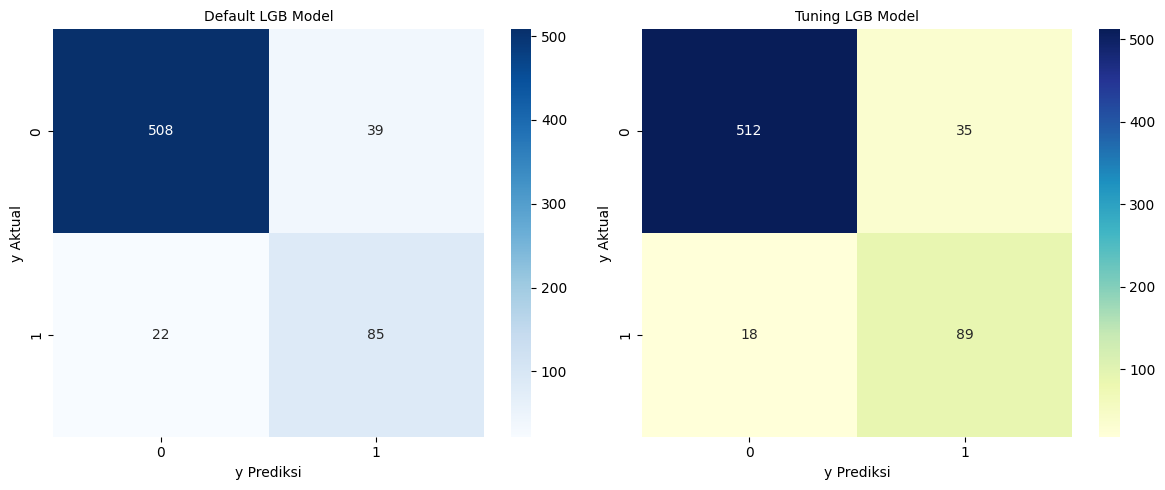

In [61]:
plt.figure(figsize=(12,5))

# Confusion Matrix untuk model default
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_default), annot=True, fmt='.0f', cmap='Blues')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Default LGB Model', size=10)

# Confusion Matrix untuk model tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_test_tunned), annot=True, fmt='.0f', cmap='YlGnBu')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Tuning LGB Model', size=10)

plt.tight_layout()
plt.show()

Performa Model LGBM Setelah Hyperparameter Tuning  

Hyperparameter tuning meningkatkan performa model LGBM tanpa resampling, menghasilkan prediksi yang lebih akurat.  

1. **F2 Score**  
   - **Default LGBM**: 76.99%  
   - **Tuned LGBM**: 80.61%  

2. **Tidak Mengalami Underfitting**  
   Skor test set yang mendekati 81% menunjukkan bahwa model memiliki kompleksitas yang cukup dan tidak mengalami underfitting.  

3. **Tidak Terjadi Overfitting**  
   Perbandingan skor antara train set dan test set mengindikasikan bahwa model tidak mengalami overfitting.  

4. **Peningkatan Metrik**  
   Tuning meningkatkan **Accuracy**, **Recall**, **Precision**, dan **F1 Score** pada kelas 0 dan kelas 1.  


## Save Model

In [62]:
best_model = lgb_grid_2.best_estimator_
save_model = best_model.fit(X_train, y_train)
pickle.dump(save_model, open(r'C:\Users\ULFAH\.1 - data science - ulf\JCDS 0508- Ulfah\Modul 3 - machine learning\capstone 3\final_model.sav', 'wb'))

[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.1s
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.3s


---
# H. Explainable Model

## Tujuan Explainability dalam Machine Learning  

Explainability dalam Machine Learning bertujuan untuk mengatasi masalah **black box** dengan menjelaskan alasan di balik prediksi atau output model.  

Dengan explainability, perusahaan dapat:  
1. Memahami faktor yang memengaruhi keputusan model.  
2. Meningkatkan kepercayaan pengguna terhadap model.  
3. Mengidentifikasi dan memperbaiki bias atau kesalahan dalam model.  
4. Mendukung pengambilan keputusan yang lebih transparan dan akurat.  

Explainability membantu memastikan bahwa model tidak hanya memberikan hasil yang baik tetapi juga dapat dipertanggungjawabkan dan mudah diinterpretasi.  


In [63]:
customer = df
customer.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [64]:
# Import Model
lgbm = pickle.load(open(r"C:\Users\ULFAH\.1 - data science - ulf\JCDS 0508- Ulfah\Modul 3 - machine learning\capstone 3\final_model.sav", 'rb'))

In [65]:
ohe_cols = list(lgbm[0].transformers_[0][1].get_feature_names_out())
impute_cols = list(lgbm[0].transformers_[1][1].get_feature_names_out())
remainder_cols = ['Complain']
cols = ohe_cols + impute_cols + remainder_cols

# Preprocessing
candidate_pre = lgbm.named_steps['Transformation'].transform(df)

model = lgbm.named_steps['model'] 
features = cols 

shap_values = shap.TreeExplainer(model,
                                 data = candidate_pre,
                                 feature_perturbation="interventional",
                                 model_output="probability").shap_values(candidate_pre)


 99%|===================| 3239/3269 [00:50<00:00]        

## **Feature Importance & SHAP Summary Plot**

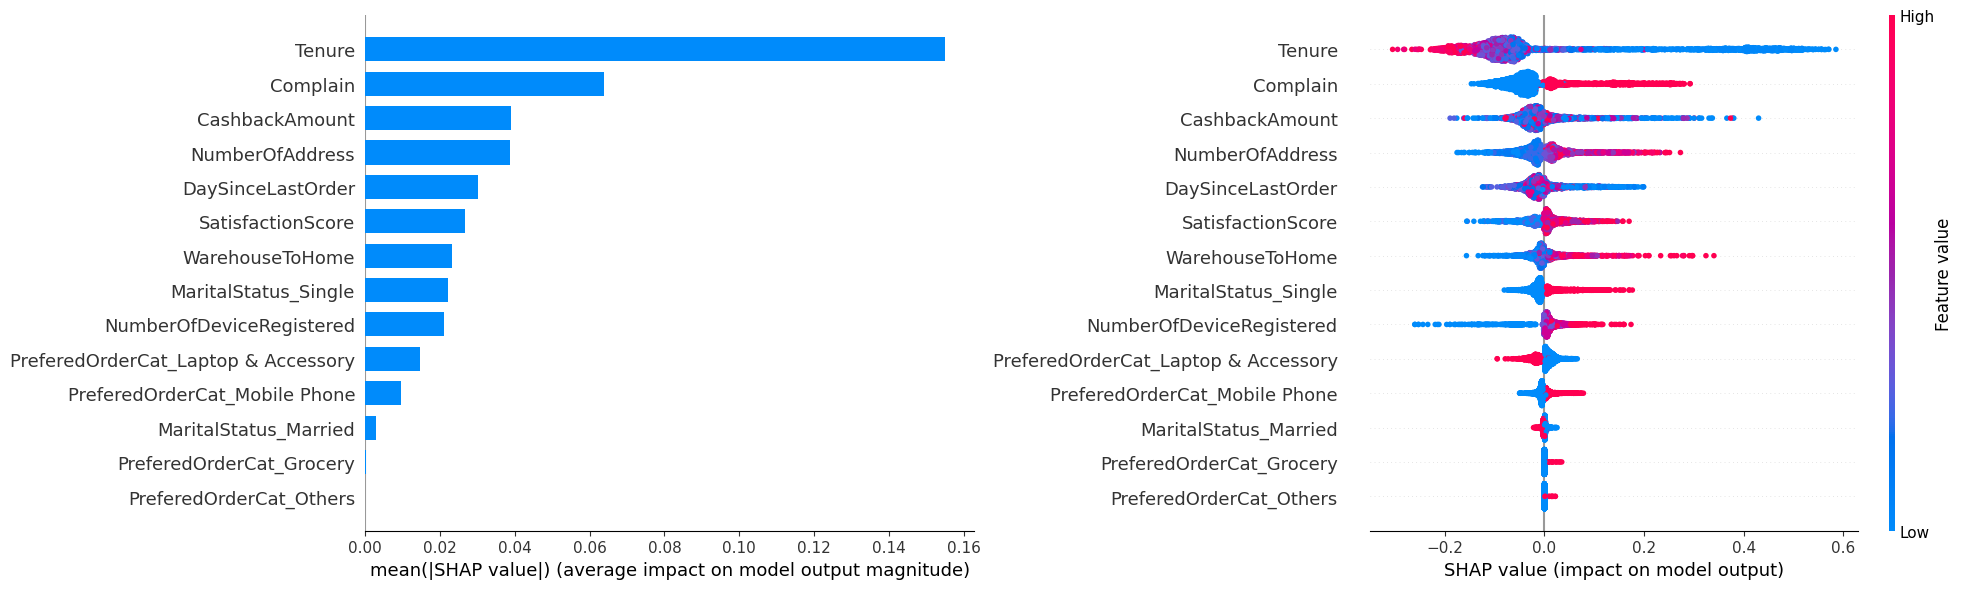

In [66]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
shap.summary_plot(shap_values, candidate_pre, feature_names = features,  title='Feature Importance', plot_type='bar', show=False, plot_size=None)
plt.subplot(1,2,2)
shap.summary_plot(shap_values, candidate_pre, feature_names = features,  title='SHAP Feature', show=False, plot_size=None)
plt.show()

### SHAP Feature Importance dan SHAP Summary Plot

1. **Tenure** adalah fitur yang paling penting dalam model LGBM ini. Fitur ini memiliki dampak signifikan terhadap kemungkinan churn customer.
2. Dari summary plot, kita bisa melihat bahwa semakin kecil nilai `Tenure` (yang berarti customer baru saja bergabung dengan layanan E-Commerce ini), semakin besar kemungkinan customer tersebut mengalami churn. Sebaliknya, nilai `Tenure` yang lebih tinggi (customer yang telah lama bergabung) cenderung mengurangi kemungkinan churn.
3. **Complain** adalah fitur penting kedua. 
4. Nilai complain yang tinggi (ketika customer mengajukan complain) memiliki dampak yang signifikan terhadap peningkatan kemungkinan churn.
5. Fitur ketiga yang paling berpengaruh adalah **NumberOfAddress**.
6. Semakin tinggi nilai `NumberOfAddress` (jumlah alamat yang terdaftar oleh customer), semakin besar kemungkinan customer tersebut akan churn.


**10 Customer paling berpotensi Churn**

In [67]:
pred_proba = lgbm.predict_proba(customer)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


In [68]:
customer['Prediction(Prob->1)'] = pred_proba[:,1]
customer.sort_values(by='Prediction(Prob->1)', ascending=False).head(10)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,Prediction(Prob->1)
475,1.0,17.0,5,Mobile Phone,5,Single,8,1,1.0,149.04,1,0.994914
2014,1.0,9.0,5,Mobile Phone,3,Single,8,1,1.0,145.90,1,0.994729
146,1.0,20.0,5,Mobile Phone,5,Married,6,1,1.0,148.35,1,0.994553
1043,0.0,30.0,5,Mobile Phone,2,Single,2,1,0.0,111.18,1,0.994353
2449,0.0,30.0,5,Mobile Phone,1,Single,2,1,0.0,111.18,1,0.994353
1891,0.0,29.0,4,Laptop & Accessory,3,Divorced,4,1,1.0,159.16,1,0.993683
1608,0.0,NaN,5,Mobile Phone,1,Single,2,1,0.0,123.40,1,0.993614
704,0.0,NaN,5,Mobile Phone,2,Single,2,1,0.0,123.40,1,0.993614
2288,0.0,29.0,4,Laptop & Accessory,3,Married,4,1,1.0,159.16,1,0.993256
2142,0.0,NaN,4,Mobile Phone,5,Married,5,1,0.0,123.35,1,0.992610


### Analisis 10 Customer Paling Berpotensi Churn

Berdasarkan data yang diberikan, kita dapat mengidentifikasi 10 pelanggan dengan probabilitas tertinggi untuk melakukan churn. Berikut adalah ringkasan karakteristik mereka:

- **Probabilitas Churn**: 10 pelanggan tersebut memiliki probabilitas sebesar **99.26% hingga 99.49%** untuk melakukan churn.
- **Tenure**: Semua pelanggan memiliki `Tenure` **0 atau 1 bulan**, menandakan mereka adalah pelanggan baru atau belum lama bergabung.
- **Kategori Transaksi**: Dalam 1 bulan terakhir, pelanggan ini melakukan transaksi pada kategori **`Mobile Phone`** atau **`Laptop & Accessory`**.
- **Complain**: Seluruh pelanggan tersebut telah mengajukan **keluhan (complain)**.
- **Hari Terakhir Bertransaksi**: Mereka baru saja melakukan pesanan **0 atau 1 hari yang lalu**.

Karakteristik ini dapat digunakan untuk mengembangkan strategi retensi pelanggan yang lebih efektif, seperti memberikan insentif khusus atau menyelesaikan keluhan dengan cepat untuk mengurangi kemungkinan churn. 


**Individual SHAP**

Cek karakteristik customer yang berpotensi churn

In [69]:
def shap_plot(j,model,S, columns):
    shap.initjs()
    values = model.predict(S, pred_contrib=True)
    y_pred = model.predict(S)[j]
    shap_values = values[:,:-1]
    base_values = values[:,-1]
    
    p = shap.force_plot(base_values[j], shap_values[j], S[j], columns)
    print(f"The prediction must predict this Customer: {('Potential' if y_pred == 1 else 'Not Potential')} to Churn")
    return p

In [70]:
prob_churn =  customer[customer['Churn'] == 1].sort_values('Prediction(Prob->1)', ascending=False)

In [71]:
# Customer paling berpotensi Churn ke 1
model = lgbm.named_steps['model']
feature = lgbm.named_steps['Transformation'].transform(prob_churn)
columns = cols

shap_plot(0,model,feature, columns)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
The prediction must predict this Customer: Potential to Churn


In [72]:
# Customer paling berpotensi Churn ke 2
shap_plot(1,model,feature, columns)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
The prediction must predict this Customer: Potential to Churn


In [73]:
# Customer paling berpotensi Churn ke 10
shap_plot(9,model,feature, columns)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
The prediction must predict this Customer: Potential to Churn


Pelanggan ke-1, ke-2, dan ke-10 yang memiliki peluang tertinggi untuk churn menunjukkan karakteristik serupa, yaitu:  
- Faktor utama yang memengaruhi potensi churn mereka adalah **`Tenure`** dan **`Complain`**. Hal ini sejalan dengan hasil analisis feature importance yang telah dilakukan sebelumnya.


---
# I. Model Deployment

Berikut WebApp untuk membantu perusahaan dalam memprediksi apakah pelanggan akan melakukan churn atau tidak, dengan cara memasukkan data pelanggan berdasarkan kriteria yang sudah ditentukan:

Link: [https://ulfahdw-customer-churn-app.streamlit.app/](https://ulfahdw-customer-churn-app.streamlit.app/)

![App Screenshot](app.png)

---
# J. Conclusion & Recommendation

## Conclusion

#### **Model dapat melakukan prediksi sehingga promosi lebih tepat sasaran**

In [74]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       547
           1       0.72      0.83      0.77       107

    accuracy                           0.92       654
   macro avg       0.84      0.88      0.86       654
weighted avg       0.93      0.92      0.92       654




- **Recall 0 (94%):** Model berhasil mengidentifikasi **94% pelanggan yang tidak churn**, menunjukkan bahwa pelanggan yang loyal dapat terdeteksi dengan baik.  
- **Recall 1 (83%):** Model berhasil mengidentifikasi **83% pelanggan yang churn**, yang menunjukkan kemampuan model dalam mendeteksi pelanggan yang berisiko churn.  
- **Precision 1 (72%):** Model memiliki **72% ketepatan** dalam memprediksi pelanggan yang churn, namun ada **28% false positive** (pelanggan yang diprediksi churn tetapi tetap loyal).

#### **Error dan Konsekuensinya:**
**Type 1 Error (False Positive):**  
- Model salah memprediksi pelanggan akan churn, padahal tidak.  
- **Dampak:** Perusahaan memberikan promosi yang tidak diperlukan, dengan biaya **$100 per customer**.

**Type 2 Error (False Negative):**  
- Model salah memprediksi pelanggan tidak akan churn, padahal pelanggan tersebut churn.  
- **Dampak:** Kehilangan pelanggan, dengan estimasi kerugian sebesar **$450 per customer**.

---
### **Asumsi Dasar:**

- **Biaya promosi untuk mencegah churn:** $100 per pelanggan.  
- **Biaya kerugian jika pelanggan churn:** $450 per pelanggan.  
- **Total pelanggan dalam data sampel:** 654 pelanggan.  
- Dari total **654 pelanggan**:  
  - **107 pelanggan diprediksi churn.**  
  - **547 pelanggan adalah loyal.**  

---

### **Tanpa Menggunakan Machine Learning:**

Tanpa prediksi churn, perusahaan harus memberikan promosi kepada semua pelanggan untuk mencegah churn.  
**Perhitungan biaya promosi:**
- **Total biaya promosi:**  
  $100 x 654 = **$65,400**

- **Biaya promosi yang tepat sasaran untuk pelanggan churn:**  
  $450 x 107 = **$48,150**

- **Biaya promosi yang terbuang (untuk pelanggan loyal):**  
  $65,400 - $48,150 = **$17,250**  

**Estimasi kerugian bulanan:**  
Karena data ini hanya **1/5** dari total pelanggan (3,269), maka total kerugian bulanan adalah:  
$17,250 x 5 = **$86,250 per bulan**.

---

### **Dengan Menggunakan Machine Learning:**

Dengan menggunakan Machine Learning, promosi difokuskan pada pelanggan yang diprediksi akan churn.  
**Perhitungan biaya promosi:**

- **Biaya promosi untuk pelanggan churn (False Positive + True Positive):**  
  (36 + 91) x $100 = **$12,700**

- **Kehilangan profit akibat churn yang tidak terdeteksi (False Negative):**  
  16 x $450 = **$7,200**

- **Biaya promosi yang tepat sasaran (True Positive):**  
  91 x $450 = **$40,950**

**Profit yang dihasilkan perusahaan:**  
$40,950 - $12,700 - $7,200 = **$21,050**  

**Estimasi profit bulanan:**  
Karena data ini hanya **1/5** dari total pelanggan (3,269), maka total profit bulanan adalah:  
$21,050 x 5 = **$105,250 per bulan**.

---

### **Perbandingan:**

- **Tanpa ML:** Perusahaan mengalami **kerugian sebesar $86,250 per bulan**.  
- **Dengan ML:** Perusahaan berhasil menghasilkan **profit sebesar $105,250 per bulan**.

### **Kesimpulan:**

Penggunaan **Machine Learning**, khususnya algoritma **LightGBM** yang telah di-tuning, memberikan keuntungan signifikan dengan profit hingga **$105,250 per bulan**. Hal ini menunjukkan potensi besar dalam mengurangi biaya promosi yang tidak tepat sasaran dan meningkatkan efektivitas strategi retention pelanggan.


### Faktor yang memengaruhi Customer Churn

Berdasarkan Feature Importance dan SHAP Summary Plot, lima faktor utama yang mempengaruhi prediksi Customer Churn secara berurutan adalah:

1. **`Tenure`**
   - Semakin kecil nilai `Tenure` (lama waktu berlangganan), semakin besar kemungkinan customer akan churn. Sebaliknya, semakin lama customer berlangganan, semakin kecil kemungkinan mereka akan churn. Faktor ini memiliki pengaruh tertinggi dibandingkan faktor lainnya.

2. **`Complain`**
   - Customer yang memiliki nilai `Complain` tinggi (sering mengajukan komplain atau ketidakpuasan) memiliki peluang lebih besar untuk churn. Hal ini menunjukkan bahwa keluhan atau ketidakpuasan customer sangat signifikan dalam memengaruhi loyalitas mereka terhadap perusahaan.

3. **`CashbackAmount`**
   - Semakin kecil nilai `CashbackAmount` (insentif yang diterima customer), semakin besar kemungkinan mereka akan churn. Artinya, cashback atau insentif finansial dapat menjadi salah satu cara untuk meningkatkan kepuasan dan retensi customer.

4. **`NumberOfAddress`**
   - Jumlah alamat yang terdaftar pada akun juga memengaruhi churn. Nilai yang tinggi dapat menunjukkan tingkat mobilitas atau aktivitas customer yang lebih besar, yang berpotensi menurunkan risiko churn.

5. **`DaySinceLastOrder`**
   - Semakin lama interval waktu sejak pemesanan terakhir, semakin besar kemungkinan customer akan churn. Ini mencerminkan pentingnya interaksi dan hubungan yang konsisten dengan customer.

Faktor-faktor ini menunjukkan bahwa pengalaman customer, baik dari durasi penggunaan layanan, kepuasan terhadap layanan, hingga interaksi terbaru, menjadi penentu utama dalam keputusan churn customer.


## Recommendation

---
### **Rekomendasi Bisnis**

**Untuk Perusahaan E-Commerce:**

**1. Meningkatkan Retensi dengan Fokus pada `Tenure`**
- Berikan voucher diskon **10% untuk pelanggan yang sudah berlangganan lebih dari 6 bulan**.  
- Tambahkan fitur "Penghargaan Pelanggan Lama" di aplikasi, seperti badge atau poin ekstra untuk pembelian rutin.  
- Kirimkan email onboarding yang interaktif untuk pelanggan baru, mencakup panduan penggunaan produk dan penawaran eksklusif.  


**2. Menangani Keluhan (`Complain`) Secara Proaktif**
- Targetkan penyelesaian 90% keluhan pelanggan dalam waktu **24 jam** melalui tim layanan pelanggan yang responsif.  
- Tambahkan fitur feedback otomatis di aplikasi, seperti tombol "Laporkan Masalah" dengan respons yang cepat dan mudah.  
- Analisis data keluhan secara berkala untuk mengidentifikasi dan memperbaiki masalah yang sering muncul.  


**3. Meningkatkan Kepuasan Melalui Cashback atau Insentif (`CashbackAmount`)**
- Luncurkan program cashback berbasis loyalitas, misalnya **5% untuk pembelian pertama** dan meningkat hingga **10% setelah 3 bulan**.  
- Kirimkan penawaran personal, seperti "Cashback Eksklusif: Hingga Rp50.000" kepada pelanggan yang jarang bertransaksi dalam 3 bulan terakhir.  
- Tampilkan saldo cashback secara real-time di aplikasi untuk mendorong pelanggan memanfaatkan insentif.  


**4. Implementasi Sistem Prediksi Churn Berbasis Machine Learning**
- Integrasikan model prediksi churn ke dalam CRM untuk memberikan daftar mingguan pelanggan yang berisiko churn.  
- Kirimkan kampanye personal kepada pelanggan berisiko tinggi, seperti diskon **20% untuk pembelian berikutnya dalam 7 hari**.  
- Evaluasi performa model prediksi churn secara rutin untuk memastikan akurasi dan efektivitasnya.  


**5. Optimalkan Strategi Promosi dan Marketing Funnel**
- Analisis data perjalanan pelanggan untuk mengidentifikasi titik drop-off terbesar, seperti pelanggan yang meninggalkan keranjang belanja.  
- Kirimkan email otomatis kepada pelanggan yang meninggalkan keranjang belanja dengan teks seperti: "Produk Anda Hampir Habis! Selesaikan Pembelian Sekarang dan Dapatkan Diskon Rp50.000".  
- Gunakan personalisasi berbasis data untuk merekomendasikan produk yang sering dibeli bersama pembelian pelanggan sebelumnya.  


**6. Pengembangan WebApp untuk Implementasi Machine Learning**
- Bangun dashboard berbasis web untuk memantau churn secara real-time, menampilkan pelanggan berisiko tinggi, dan memberikan saran tindakan otomatis.  
- Integrasikan notifikasi otomatis untuk tim marketing setiap kali ada pelanggan yang berisiko churn.  
- Uji coba aplikasi pada segmen pelanggan tertentu untuk mengukur efektivitasnya dalam **mengurangi churn hingga 10% dalam 3 bulan pertama**.  

Dengan penerapan rekomendasi ini, perusahaan dapat secara efektif meningkatkan retensi pelanggan, memaksimalkan loyalitas, dan mengurangi churn dengan signifikan.


---
### **Rekomendasi Model**

**Validitas Model:**  
Model machine learning yang dikembangkan memiliki akurasi valid hanya pada rentang nilai berikut:  
- **Tenure:** 0–61 bulan  
- **Warehouse To Home:** 5–127 km  
- **Number of Device Registered:** 1–6 perangkat  
- **Number of Address:** 1–22 alamat  
- **Day Since Last Order:** 0–46 hari  
- **Cashback Amount:** 0–324.99  

**Rekomendasi untuk Meningkatkan Performa Model:**  
1. **Kumpulkan Data Tambahan:**  
   - Fokus pada pengumpulan lebih banyak data dari kelas minoritas untuk mengatasi ketidakseimbangan data.  
   - Perluas cakupan rentang fitur, jika memungkinkan, untuk meningkatkan generalisasi model.  

2. **Optimalkan Hyperparameter Tuning:**  
   - Tambahkan parameter tuning seperti learning rate, max depth, atau weight balancing untuk meningkatkan akurasi prediksi.  

3. **Tangani Duplikasi Data:**  
   - Gunakan **ID Pelanggan** sebagai identifikasi unik untuk mendeteksi dan menghapus data duplikat.  

4. **Tambahkan Fitur Baru:**  
   - Sertakan fitur tambahan seperti:  
     - Waktu pengiriman (delivery time).  
     - Ketepatan waktu pengiriman (on-time delivery).  
     - Indikator kualitas layanan, seperti rating pelanggan atau jumlah keluhan.  


